#<br>**Foundations of Deep Learning**<br/>

---

#Deep Learning for Image Classification: A Study on CIFAR-10

Authors:

Ludovica Di Marco - 904611 | Davide Ronchi - 903320 | Camilla Vismara - 839339

---



# Contents

- [Summary](#summary)
- [Importing Libraries](#importing-libraries)
- [Data preparation](#data-preparation)
  - [Data Loading functions definition](#data-loading-functions-definition)
  - [Data Loading](#data-loading)
- [Data Exploration](#data-exploration)
  - [Plotting images](#plotting-images)
  - [Descriptive statistics](#descriptive-statistics)
    - [Class Distribution](#class-distribution)
    - [Pixel Value distribution](#pixel-value-distribution)
- [Data Preprocessing](#data-preprocessing)
  - [Standardize images](#standardize-images)
  - [One hot encoding](#one-hot-encoding)
- [Models training](#models-training)
  - [CNN1 - Basic CNN](#Basic-CNN---CNN1)
    - [CNN1 - Definition](#CNN1---Definition)
    - [CNN1 - Parameters and Callbacks](#CNN1---Parameters-and-Callbacks)
    - [CNN1 - Training](#CNN1---Training)
    - [CNN1 - Evaluation](#CNN1---Evaluation)

  - [CNN2 - Improved CNN](#Improved-CNN---CNN2)
    - [CNN2 - Definition](#CNN2---Definition)
    - [CNN2 - Parameters and Callbacks](#CNN2---Parameters-and-Callbacks)
    - [CNN2 - Training](#CNN2---Training)
    - [CNN2 - Evaluation](#CNN2---Evaluation)

  - [Residual Network - res_model](#Residual-Network---res_model)
    - [res_model - Definition](#res_model---Definition)
    - [res_model - Parameters and Callbacks](#res_model---Parameters-and-Callbacks)
    - [res_model - Training](#res_model---Training)
    - [res_model - Evaluation](#res_model---Evaluation)

 - [Data Augmentation](#Data-Augmentation)
    - [res_model_aug - Definition](#res_model_aug---Definition)
    - [res_model_aug - Parameters and Callbacks](#res_model_aug---Parameters-and-Callbacks)
    - [res_model_aug - Training](#res_model_aug---Training)
    - [res_model_aug - Evaluation](#res_model_aug---Evaluation)

 - [Transfer Learning - tl_ResNet50v2](#Transfer-Learning---tl_ResNet50v2)
    - [tl_ResNet50v2 - Parameters and Callbacks](#tl_ResNet50v2---Parameters-and-Callbacks)
    - [tl_ResNet50v2 - Training](#tl_ResNet50v2---Training)
    - [tl_ResNet50v2_ft - Fine Tuning](#tl_ResNet50v2_ft---Fine-Tuning)
    - [tl_ResNet50v2_ft - Evaluation](#tl_ResNet50v2_ft---Evaluation)

  - [Transfer Learning - tl_EfficientNetV2S](#Transfer-Learning---tl_EfficientNetV2S)
    - [tl_EfficientNetV2S - Parameters and Callbacks](#tl_EfficientNetV2S---Parameters-and-Callbacks)
    - [tl_EfficientNetV2S - Training](#tl_EfficientNetV2S---Training)
    - [tl_EfficientNetV2S_ft - Fine Tuning](#tl_EfficientNetV2S_ft---Fine-Tuning)
    - [tl_EfficientNetV2S_ft - Evaluation](#tl_EfficientNetV2S_ft---Evaluation)

- [Conclusions](#conclusions)
- [Example image](#example-image)


<a name="summary"></a>
#Summary

The goal of this project is to build and evaluate deep learning models for image classification, exploring various architectures and techniques.

We utilize the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset, a benchmark in machine learning and computer vision. CIFAR-10 consists of 60,000 32x32 color images across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck), split into 50,000 training and 10,000 test images.

To achieve this goal we followed these steps:

* **Data preparation and Preprocessing**: Loaded the CIFAR-10 dataset, standardized the images, and performed necessary preprocessing to prepare the data for training.

* **Data Exploration**: Visualized sample images, analyzed class distribution and performed some desctiptive statistics to better understand the dataset.

* **Models Training**: Trained multiple models, starting from simple convolutional networks, leading to more complex models, in order to achieve better performances:
    * **Basic CNN**: Which is a simple CNN with 3 convolutional block, establishing a baseline for performances;
    * **Improved CNN**: Enhancing the architecture with additional layers and regularization techniques such as L-2 Regularization and dropout;
    * **Residual Network**: Utilizing residual connections to facilitate deeper networks and improve learning;
    * **Data Augmentation**: Data augmentation techniques have been used to get a more robust model with the introduction of small variance.
    * **Transfer Learning**: we also used a pretrained model, in particular [ResNet50V2](https://keras.io/api/applications/resnet/#:~:text=%5Bsource%5D-,ResNet50V2,-function) and [EfficientNetV2](https://keras.io/api/applications/efficientnet_v2/#efficientnetv2s-function:~:text=%5Bsource%5D-,EfficientNetV2S,-function), as feature extractors followed by some dense layers for specializing them on the particular task;
    * **Fine Tuning**: After training the model we unfreezed all parts of the base model and retrained the whole model end-to-end with a very low learning rate to obtain further improvements on performances.
    * **Model Evaluation**: Each model has been evaluated on the test data with appropriate metrics to be able to make comparisons and choose the best model.

* After choosing the best model, this has been tested on some previously unseen images to demonstrate its operation.

<a name='importing-libraries'></a>
# Importing Libraries

In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 5.7 MB/s eta 0:00:00


In [ ]:
# General
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import random
import pandas as pd

# File handling
import os
import pickle

# Image Processing
from PIL import Image
import cv2

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Model building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Model visualization
import visualkeras
from PIL import ImageFont

Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Set seed for reproducibility

In [ ]:
seed = 123456

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

<a name="data-preparation"></a>
# Data preparation

We will work on the CIFAR-10 Dataset, for reference: https://www.cs.toronto.edu/~kriz/cifar.html

Setting Working Directories

In [ ]:
base_path = "/content/drive/MyDrive/Deep Learning/Project/"
dataset_path = "Data/cifar-10-batches-py/"

Extracting *.tar* file

In [ ]:
# file = tarfile.open(base_path + 'Data/cifar-10-python.tar.gz')

# # extracting file
# file.extractall(base_path + '/Data')

# file.close()

Create a list containing all the file names in the directory

In [ ]:
files = os.listdir(base_path + dataset_path)
for f in files:
    print(f)

test_batch
data_batch_3
data_batch_2
data_batch_5
data_batch_1
data_batch_4
batches.meta
readme.html


As we can see data is divided into batches, so we need to put them together handling them properly.

<a name="data-loading-functions-definition"></a>
## Data Loading functions definition

We will define a set of function to load and preprocess data from the directory.

In [ ]:
# Data Loader

def dataloader(batch_files, files_path):
    """
    This function loads and processes the CIFAR-10 dataset from a list of batch files.

    Args:
        batch_files (list): List of filenames for the dataset batches.
        files_path (str): Path to the directory containing the batch files.

    Returns:
        X_train (np.array): Training images.
        y_train (np.array): Training labels.
        X_test (np.array): Test images.
        y_test (np.array): Test labels.
        X_val (np.array): Validation images.
        y_val (np.array): Validation labels.
    """
    # Initialize empty lists to store training and testing images and labels
    immV_train = []
    labV_train = []
    immV_test = []
    labV_test = []

    # Loop through each file in the batch files list
    for f in batch_files:
      # If the file is a training batch, load the images and labels and append to training lists
      if f.startswith('data_batch_'):
        immV_train_i, labV_train_i = batch_loader(files_path + f)
        immV_train.append(immV_train_i)
        labV_train.append(labV_train_i)
      # If the file is not a training batch (i.e. test batch), load the images and labels and append to test lists
      else:
        immV_test_i, labV_test_i = batch_loader(files_path + f)
        immV_test.append(immV_test_i)
        labV_test.append(labV_test_i)

    # Concatenate all training images and labels from the volumes into numpy arrays
    X_train = np.concatenate(immV_train)
    y_train = np.concatenate(labV_train)

    # Split the training data into training and validation sets (90% train, 10% validation)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

    # Concatenate all test images and labels from the lists into numpy arrays
    X_test = np.concatenate(immV_test)
    y_test = np.concatenate(labV_test)

    return X_train, y_train, X_test, y_test, X_val, y_val

In [ ]:
# Batch Loader

def batch_loader(batch_file):
    """
    Loads a single batch file from the CIFAR-10 dataset and returns the images and labels.

    Args:
        batch_file (str): The path to the batch file.

    Returns:
        immV (np.array): Array of images in the batch.
        labV (np.array): Array of labels corresponding to the images.
    """

    # Extract data from the batch file
    batch_data = unpickle(batch_file)

    # Evaluating the n° of images in the batch
    img_number = len(batch_data[b'labels'])

    # Defining the image shape
    img_shape = (32,32,3)

    # Initializing as zeros the volume containing the images (immV) and the labels volume (labV)
    immV = np.zeros((img_number, *img_shape), dtype=np.uint8)
    labV = np.zeros((img_number, 1), dtype=np.uint8)

    # Loop through each image and label in the batch
    for i in range(img_number):
        # Image
        temp_img = batch_data[b'data'][i]
        temp_img = np.asarray(temp_img)
        temp_img = np.reshape(temp_img, (3, 32, 32)).transpose(1, 2, 0)
        # Assign the current image to the position 'i' in 'immV'
        immV[i] = temp_img

        # Label
        temp_lab = batch_data[b'labels'][i]
        labV[i] = temp_lab

    return immV, labV

In [ ]:
# Unpickle batch file
def unpickle(file):
    with open(file, 'rb') as fo:   # Open the file taken in input
        dict = pickle.load(fo, encoding='bytes')   # Load it using pickle
    return dict

<a name='data-loading'></a>
## Data Loading

We load data from all the 5 batches using the functions defined above. We will have data splitted into train, validation and test.

In [ ]:
batch_files = ["data_batch_1", "data_batch_2", "data_batch_3", "data_batch_4", "data_batch_5", "test_batch"]

In [ ]:
files_path = base_path + dataset_path
files_path

'/content/drive/MyDrive/Project/Data/cifar-10-batches-py/'

In [ ]:
X_train, y_train, X_test, y_test, X_val, y_val = dataloader(batch_files, files_path)

In [ ]:
print(f"X_train shape: \t{X_train.shape},\tmin value: {X_train.min()}, \tmax value: {X_train.max()}")
print(f"y_train shape: \t{y_train.shape}")

print(f"X_val shape: \t{X_val.shape},\tmin value: {X_val.min()}, \tmax value: {X_val.max()}")
print(f"y_val shape: \t{y_val.shape}")

print(f"X_test shape: \t{X_test.shape},\tmin value: {X_test.min()}, \tmax value: {X_test.max()}")
print(f"y_test shape: \t{y_test.shape}")

X_train shape: 	(45000, 32, 32, 3),	min value: 0, 	max value: 255
y_train shape: 	(45000, 1)
X_val shape: 	(5000, 32, 32, 3),	min value: 0, 	max value: 255
y_val shape: 	(5000, 1)
X_test shape: 	(10000, 32, 32, 3),	min value: 0, 	max value: 255
y_test shape: 	(10000, 1)


Extracting labels from the `batches.meta` file

In [ ]:
label_dict = unpickle(base_path + dataset_path + "batches.meta")
label_names = [label.decode('utf-8') for label in label_dict[b'label_names']]
print(label_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
num_classes = len(label_names)
num_classes

10

<a name='data-exploration'></a>
# Data Exploration

<a name='plotting-images'></a>
## Plotting images

We plot the first 6 images for each class, to have an overview of what we are talking about

In [ ]:
indices_matrix = []
images_per_class = 6

# Iterate through each class label
for class_label in range(num_classes):
    class_indices = []
    i = 0

    # Iterate through y_train to find the indices of images for the current class
    while len(class_indices) < images_per_class and i < len(y_train):
        if y_train[i, 0] == class_label:
            class_indices.append(i)
        i += 1

    # Check if there are fewer than 10 images for the current class and print a warning if so
    if len(class_indices) < images_per_class:
        print(f"Warning: There are fewer than {images_per_class} images for class {class_label} in the dataset.")

    indices_matrix.append(class_indices)

# Convert the list of lists to a 2D array for better readability
indices_matrix = np.array(indices_matrix).transpose()

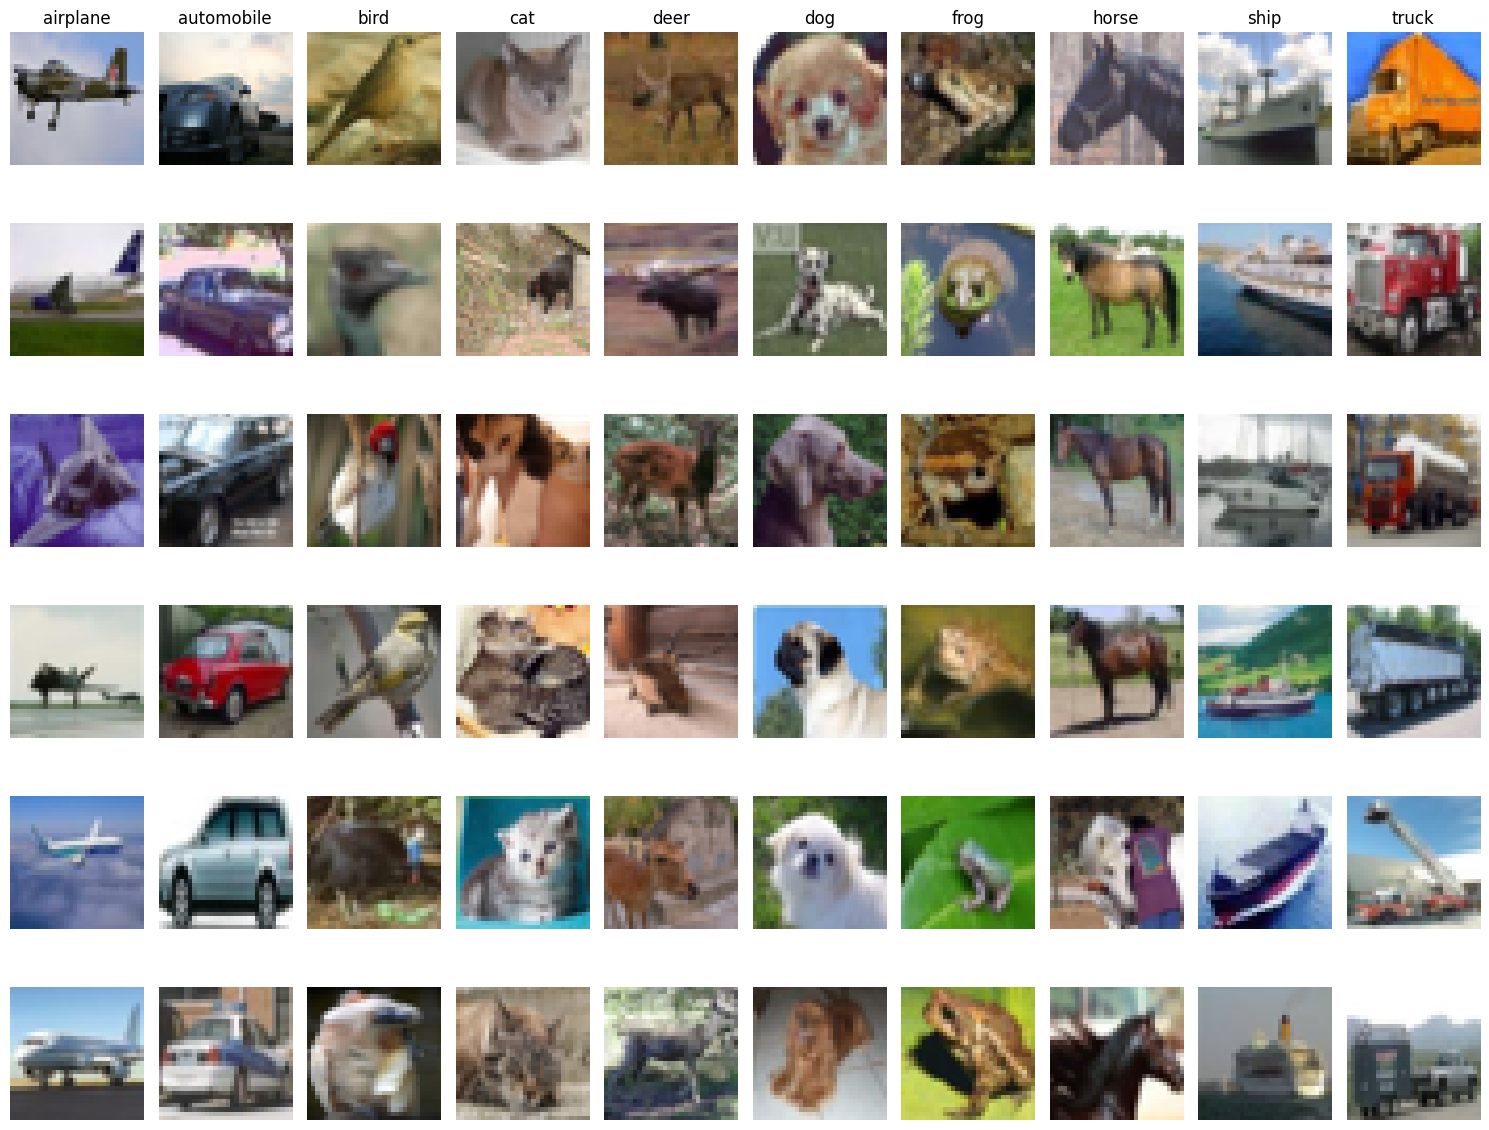

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=images_per_class, ncols=num_classes, figsize=(15, 12))

# Iterate through each class
for img_idx in range(images_per_class):
    for class_label in range(num_classes):

        ax = axes[img_idx, class_label]

        index = indices_matrix[img_idx][class_label]

        # Plot the image
        ax.imshow(X_train[index,:,:,:])
        ax.axis('off')

        # Set the title only for the first image in each row
        if img_idx == 0:
            ax.set_title(label_names[class_label], fontsize=12)

plt.tight_layout()
plt.show()

<a name='descriptive-statistics'></a>
## Descriptive statistics

<a name='class-distribution'></a>
### Class Distribution

Counting the number of occurrences for each class in `train`, `test` and `validation` dataset

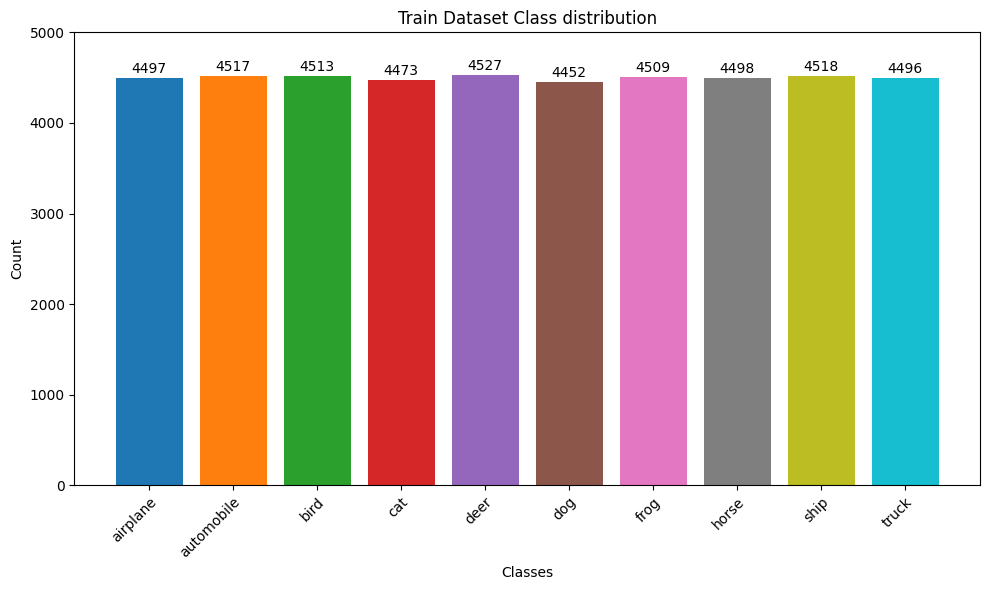

In [ ]:
colors = plt.cm.tab10(np.linspace(0, 1, 10))

class_count = np.bincount(y_train.flatten(), minlength = 10)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(10), class_count, color=colors)
plt.title("Train Dataset Class distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(np.arange(10), label_names, rotation=45, ha='right', rotation_mode='anchor')

for i, count in enumerate(class_count):
  plt.text(i, count + 0.005 * max(class_count), str(count), ha='center', va='bottom')

plt.ylim(0, 5000)
plt.tight_layout()
plt.show()

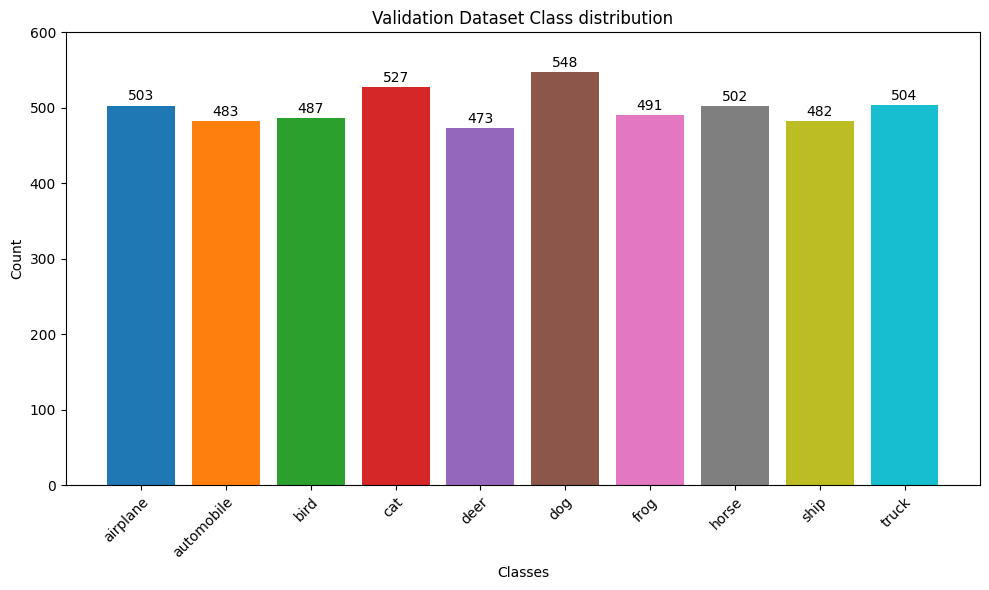

In [ ]:
colors = plt.cm.tab10(np.linspace(0, 1, 10))

class_count = np.bincount(y_val.flatten(), minlength = 10)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(10), class_count, color=colors)
plt.title("Validation Dataset Class distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(np.arange(10), label_names, rotation=45, ha='right', rotation_mode='anchor')

for i, count in enumerate(class_count):
  plt.text(i, count + 0.005 * max(class_count), str(count), ha='center', va='bottom')
plt.ylim(0, 600)
plt.tight_layout()
plt.show()

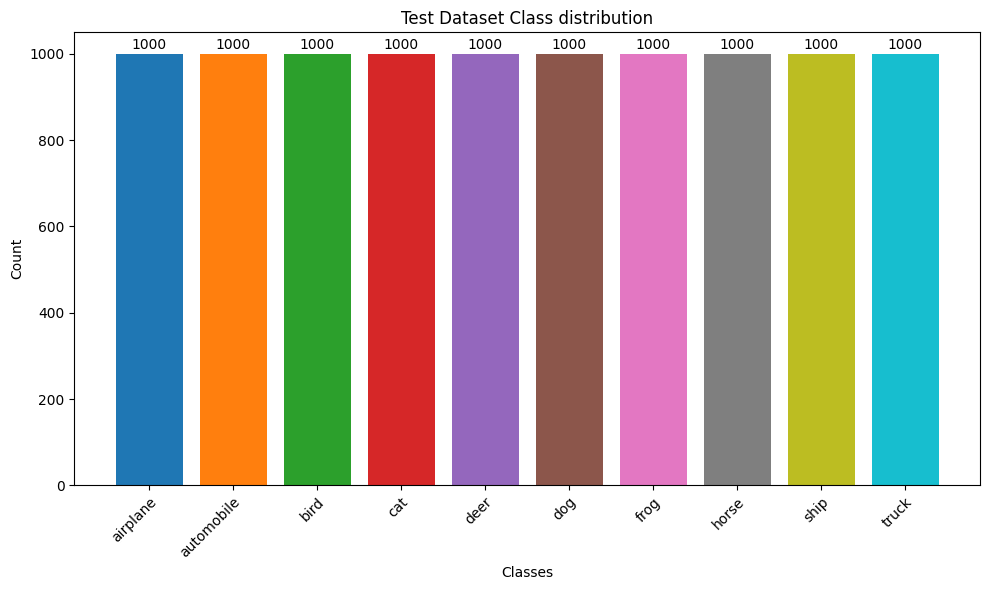

In [ ]:
colors = plt.cm.tab10(np.linspace(0, 1, 10))

class_count = np.bincount(y_test.flatten(), minlength = 10)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(10), class_count, color=colors)
plt.title("Test Dataset Class distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(np.arange(10), label_names, rotation=45, ha='right', rotation_mode='anchor')

for i, count in enumerate(class_count):
  plt.text(i, count + 0.005 * max(class_count), str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()

<a name='pixel-value-distribution'></a>
### Pixel Value distribution

The function plot_pixel_histograms(images) plots histograms showing the distributions of pixel values across Red, Green, and Blue color channels for a set of images.

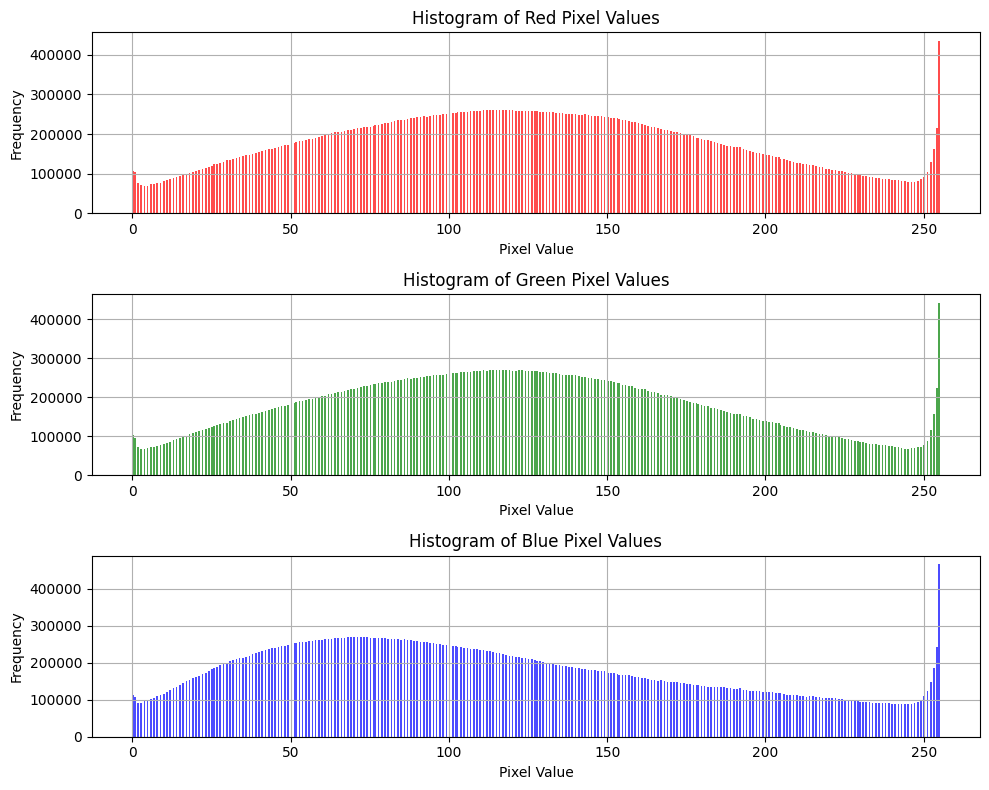

In [ ]:
def plot_pixel_histograms(images):
    fig, axes = plt.subplots(3, 1, figsize=(10, 8))

    # Compute histograms for each color channel
    for i, color in enumerate(['Red', 'Green', 'Blue']):
        channel_values = images[:, :, :, i].flatten()
        axes[i].hist(channel_values, bins=500, color=color.lower(), alpha=0.7)
        axes[i].set_title(f'Histogram of {color} Pixel Values')
        axes[i].set_xlabel('Pixel Value')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
# Assuming X_train is your dataset with shape (num_samples, 32, 32, 3)
plot_pixel_histograms(X_train)


Now we visualizes mean and standard deviation pixel values per color channel across categories for both training and test datasets.

Training set statistics:


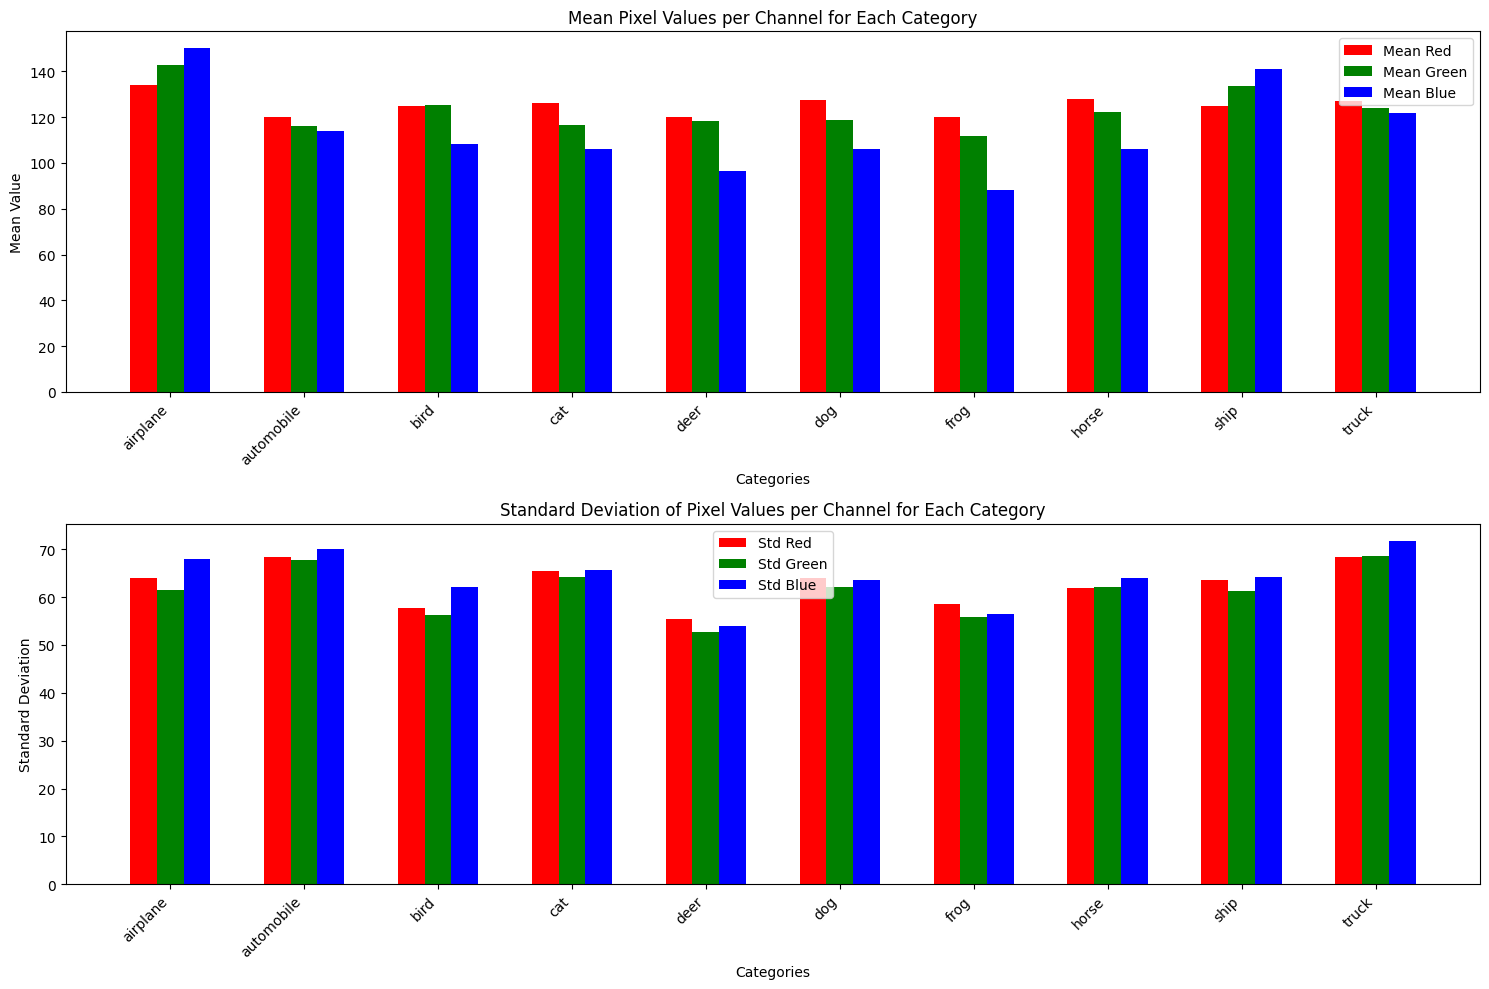

Test set statistics:


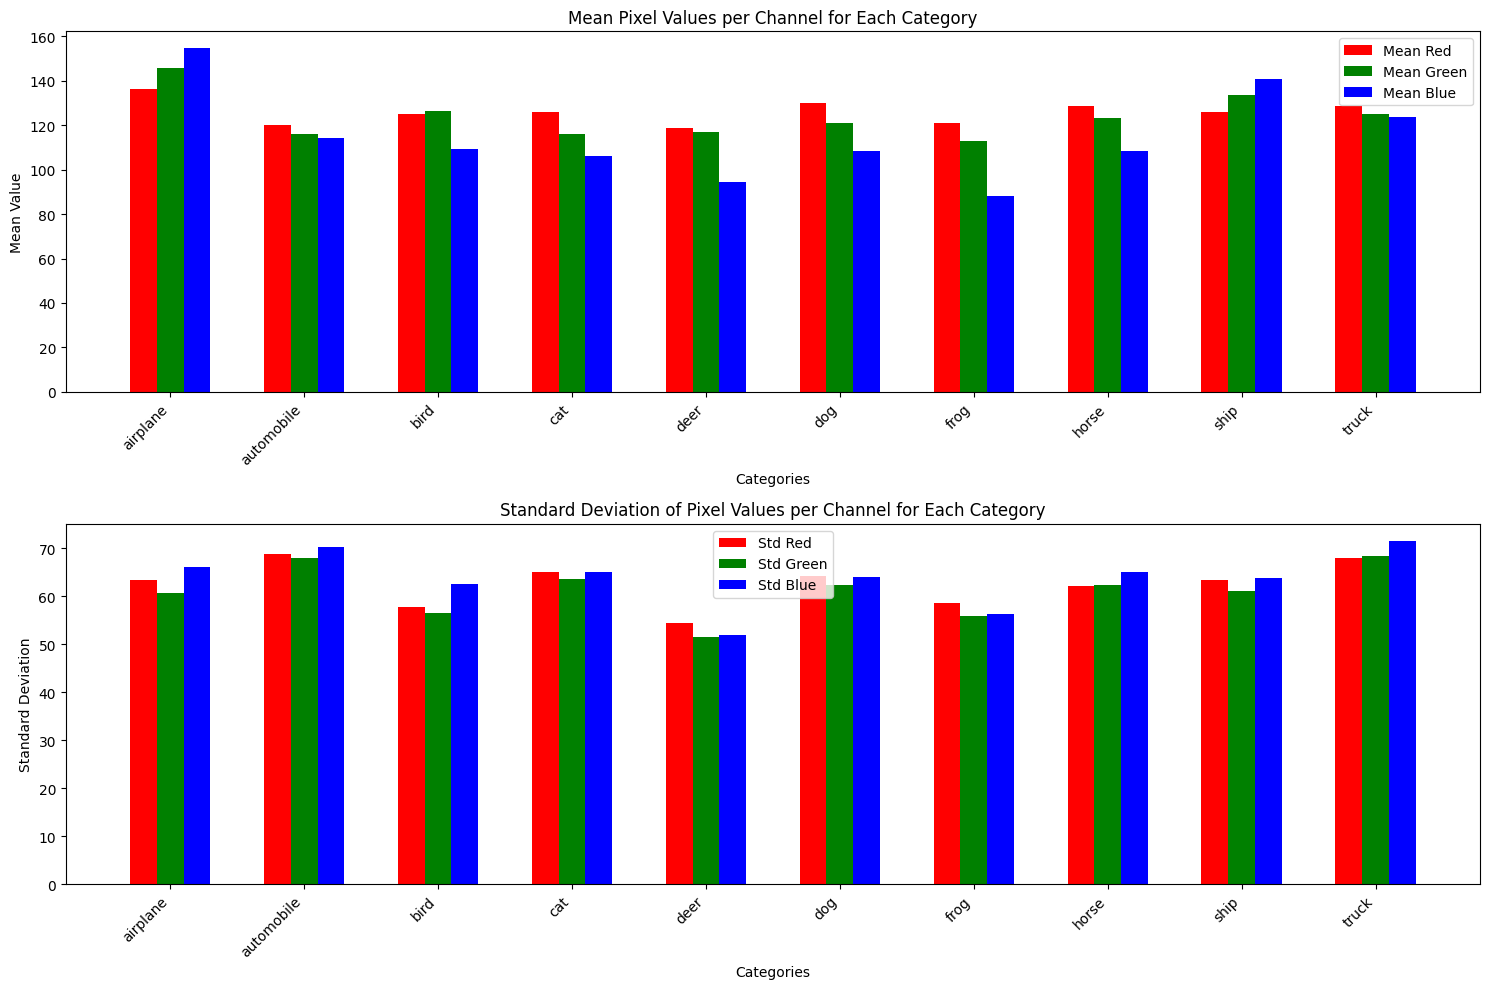

In [ ]:
def compute_pixel_statistics_by_category(images, labels, label_names):
    mean_stats = []
    std_stats = []

    for class_label in range(len(label_names)):
        class_images = images[labels.flatten() == class_label]
        mean_per_channel = np.mean(class_images, axis=(0, 1, 2))
        std_per_channel = np.std(class_images, axis=(0, 1, 2))

        mean_stats.append(mean_per_channel)
        std_stats.append(std_per_channel)

    return np.array(mean_stats), np.array(std_stats)

def plot_combined_statistics(mean_stats, std_stats, label_names, ch_names):
    num_classes = len(label_names)
    num_channels = len(ch_names)

    # Define colors for each channel
    channel_colors = {'Red': 'r', 'Green': 'g', 'Blue': 'b'}

    fig, ax = plt.subplots(2, 1, figsize=(15, 10))

    # Plot mean pixel values per category
    bar_width = 0.2
    for i, channel in enumerate(ch_names):
        ax[0].bar(np.arange(num_classes) + i * bar_width, mean_stats[:, i], width=bar_width, color=channel_colors[channel], label=f'Mean {channel}')

    ax[0].set_title('Mean Pixel Values per Channel for Each Category')
    ax[0].set_xlabel('Categories')
    ax[0].set_ylabel('Mean Value')
    ax[0].set_xticks(np.arange(num_classes) + bar_width)
    ax[0].set_xticklabels(label_names, rotation=45, ha='right')
    ax[0].legend()

    # Plot standard deviation of pixel values per category
    for i, channel in enumerate(ch_names):
        ax[1].bar(np.arange(num_classes) + i * bar_width, std_stats[:, i], width=bar_width, color=channel_colors[channel], label=f'Std {channel}')

    ax[1].set_title('Standard Deviation of Pixel Values per Channel for Each Category')
    ax[1].set_xlabel('Categories')
    ax[1].set_ylabel('Standard Deviation')
    ax[1].set_xticks(np.arange(num_classes) + bar_width)
    ax[1].set_xticklabels(label_names, rotation=45, ha='right')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# Color channel names
ch_names = ['Red', 'Green', 'Blue']

# Compute pixel statistics for each category in the training set
mean_stats_train, std_stats_train = compute_pixel_statistics_by_category(X_train, y_train, label_names)

# Compute pixel statistics for each category in the test set
mean_stats_test, std_stats_test = compute_pixel_statistics_by_category(X_test, y_test, label_names)

# Display combined statistics for the training set
print("Training set statistics:")
plot_combined_statistics(mean_stats_train, std_stats_train, label_names, ch_names)

# Display combined statistics for the test set
print("Test set statistics:")
plot_combined_statistics(mean_stats_test, std_stats_test, label_names, ch_names)

<a name='data-preprocessing'></a>
# Data Preprocessing

<a name='standardize-images'></a>
## Standardize images

In [ ]:
def standardize_images(X_train, X_val, X_test):
    '''
    Standardize images by subtracting the mean and dividing by standard deviation of the training set
    '''
    mean = np.mean(X_train)
    std = np.std(X_train)

    X_train = (X_train - mean) / (std + 1e-8)
    X_val = (X_val - mean) / (std + 1e-8)
    X_test = (X_test - mean) / (std + 1e-8)
    return X_train, X_val, X_test, mean, std

In [ ]:
X_train, X_val, X_test, mean, std = standardize_images(X_train, X_val, X_test)

Dumping *mean* and *standard* deviation for later use

In [ ]:
os.makedirs(base_path + 'Data/training_data/', exist_ok=True)

with open(base_path + 'Data/training_data/X_train_mean.pkl', 'wb') as f:
    pickle.dump(mean, f)

with open(base_path + 'Data/training_data/X_train_std.pkl', 'wb') as f:
    pickle.dump(std, f)

In [ ]:
print(f"X_train shape: \t{X_train.shape},\tmin value: {X_train.min()}, \tmax value: {X_train.max()}")
print(f"y_train shape: \t{y_train.shape}")

print(f"X_val shape: \t{X_val.shape},\tmin value: {X_val.min()}, \tmax value: {X_val.max()}")
print(f"y_val shape: \t{y_val.shape}")

print(f"X_test shape: \t{X_test.shape},\tmin value: {X_test.min()}, \tmax value: {X_test.max()}")
print(f"y_test shape: \t{y_test.shape}")

X_train shape: 	(45000, 32, 32, 3),	min value: -1.8818130406147902, 	max value: 2.092982848500095
y_train shape: 	(45000, 1)
X_val shape: 	(5000, 32, 32, 3),	min value: -1.8818130406147902, 	max value: 2.092982848500095
y_val shape: 	(5000, 1)
X_test shape: 	(10000, 32, 32, 3),	min value: -1.8818130406147902, 	max value: 2.092982848500095
y_test shape: 	(10000, 1)


<a name='one-hot-encoding'></a>
## One hot encoding

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [ ]:
y_train.shape

(45000, 10)

In [ ]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

<a name='models-training'></a>
# Models training

Defining `input_shape`, for the input layer, and `num_classes` for the output layer of the model

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
num_classes = y_train.shape[1]
print(f"Input shape:\t\t{input_shape}\nNumber of classes:\t{num_classes}")

Input shape:		(32, 32, 3)
Number of classes:	10


<a name='Basic-CNN---CNN1'></a>
## Basic CNN - CNN1

This architecture consists in a simple Convolutional Neural Network with three convolutional blocks, each with a convolutional layer with increasing number of filters [32, 64, 128], followed by ReLU activation and max pooling, culminating in a global max pooling layer and two dense layers with 64 neurons the first and 10 (`num_classes`) the last. The final one uses softmax activation for classification.

<a name='CNN1---Definition'></a>
### CNN1 - Definition

In [ ]:
def create_model(input_shape, num_classes):
    inputs = keras.Input(input_shape)
    x = inputs

    # First Convolutional Block
    x = keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same')(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.MaxPooling2D(3, strides=3, padding='same')(x)

    # Second Convolutional Block
    x = keras.layers.Conv2D(64, 3, padding='same')(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.MaxPooling2D(3, strides=3, padding='same')(x)

    # Third Convolutional Block
    x = keras.layers.Conv2D(128, 3, padding='same')(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.GlobalMaxPooling2D()(x)

    # Dense Layer
    x = keras.layers.Dense(64, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
    model = keras.Model(inputs, outputs, name='CNN1')
    return model

In [ ]:
CNN1 = create_model(input_shape, num_classes)
CNN1.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_4 (Activation)   (None, 11, 11, 64)        0         
                                                              

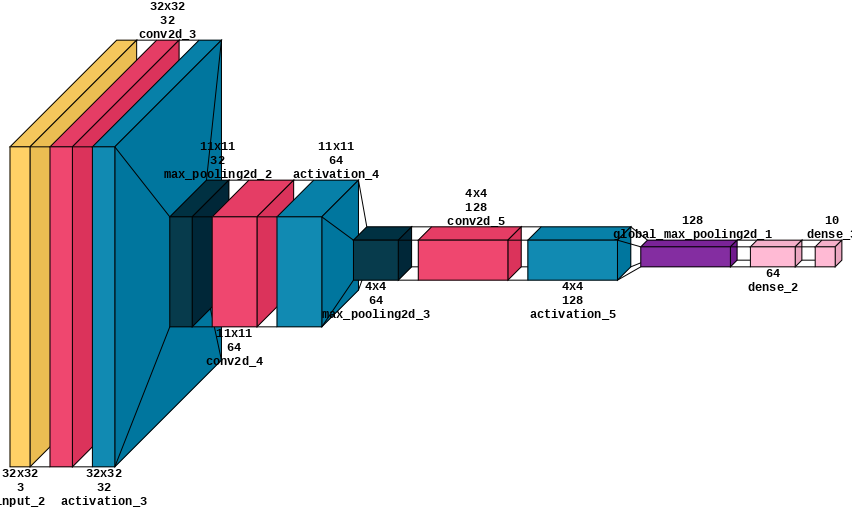

In [ ]:
# 3D Visualization
try:
    font = ImageFont.truetype("LiberationMono-Bold.ttf", 12)  # You can change the font and size here
except OSError:
    font = None

def text_callable(layer_index, layer):
    # Every other piece of text is drawn above the layer, the first one below
    above = bool(layer_index%2)

    # Get the output shape of the layer
    output_shape = [x for x in list(layer.output_shape) if x is not None]

    # If the output shape is a list of tuples, we only take the first one
    if isinstance(output_shape[0], tuple):
        output_shape = list(output_shape[0])
        output_shape = [x for x in output_shape if x is not None]

    # Variable to store text which will be drawn
    output_shape_txt = ""

    # Create a string representation of the output shape
    for ii in range(len(output_shape)):
        output_shape_txt += str(output_shape[ii])
        if ii < len(output_shape) - 2: # Add an x between dimensions, e.g. 3x3
            output_shape_txt += "x"
        if ii == len(output_shape) - 2: # Add a newline between the last two dimensions, e.g. 3x3 \n 64
            output_shape_txt += "\n"

    # Add the name of the layer to the text, as a new line
    output_shape_txt += f"\n{layer.name}"

    # Return the text value and if it should be drawn above the layer
    return output_shape_txt, above

# Create a VisualKeras class instance
vis = visualkeras.layered_view(CNN1,
                               to_file = base_path + 'Models/CNN1.png',
                               font=font,
                               spacing=20,
                               draw_volume=True,
                               scale_xy=10,
                               scale_z=0.7,
                               text_callable=text_callable)
# Display the visualization
vis

<a name='CNN1---Parameters-and-Callbacks'></a>
### CNN1 - Parameters and Callbacks

In [ ]:
# Hyperparameters
lr = 0.001
epochs = 40
batch_size = 64

# Optimizer, Loss and Metrics
optimizer = keras.optimizers.Adam(learning_rate=lr)
loss_function = keras.losses.CategoricalLy()
metrics = ['accuracy']

Callbacks

In [ ]:
# Model Checkpoint
CNN1_checkpoint_filepath = base_path + 'Models/CNN1_checkpoint.keras'
callback_cp = keras.callbacks.ModelCheckpoint(CNN1_checkpoint_filepath,
                                              monitor='val_loss',
                                              save_best_only=True,
                                              save_weights_only=False,
                                              verbose=1
                                              )

# Backup and Restore
callback_br = keras.callbacks.BackupAndRestore(backup_dir = base_path + "backup/CNN1")

# CSV Logger for history saving
history_CNN1_filepath = base_path + 'backup/history_CNN1.csv'
callback_CVS = keras.callbacks.CSVLogger(history_CNN1_filepath, separator=",", append=True)

callbacks = [callback_cp, callback_br, callback_CVS]

Compile Model

In [ ]:
CNN1.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

<a name='CNN1---Training'></a>
### CNN1 - Training

In [ ]:
# Train the model
history_CNN1 = CNN1.fit(X_train, y_train,
                        epochs = epochs,
                        batch_size = batch_size,
                        validation_data = (X_val, y_val),
                        callbacks = callbacks)

Epoch 1/40
703/704 [============================>.] - ETA: 0s - loss: 1.4640 - accuracy: 0.4710
Epoch 1: val_loss improved from inf to 1.26104, saving model to /content/drive/MyDrive/Deep Learning/Project/Models/CNN1_checkpoint.keras
704/704 [==============================] - 50s 70ms/step - loss: 1.4640 - accuracy: 0.4710 - val_loss: 1.2610 - val_accuracy: 0.5554
Epoch 2/40
703/704 [============================>.] - ETA: 0s - loss: 1.0706 - accuracy: 0.6231
Epoch 2: val_loss improved from 1.26104 to 1.01066, saving model to /content/drive/MyDrive/Deep Learning/Project/Models/CNN1_checkpoint.keras
704/704 [==============================] - 46s 65ms/step - loss: 1.0705 - accuracy: 0.6232 - val_loss: 1.0107 - val_accuracy: 0.6350
Epoch 3/40
703/704 [============================>.] - ETA: 0s - loss: 0.9071 - accuracy: 0.6854
Epoch 3: val_loss improved from 1.01066 to 0.90127, saving model to /content/drive/MyDrive/Deep Learning/Project/Models/CNN1_checkpoint.keras
704/704 [===============

In [ ]:
# Load the CSV file
history_df = pd.read_csv(history_CNN1_filepath)

In [ ]:
best_epoch = history_df['val_loss'].idxmin()
best_val_loss = history_df['val_loss'].min()
best_val_accuracy = history_df['val_accuracy'].iloc[best_epoch]

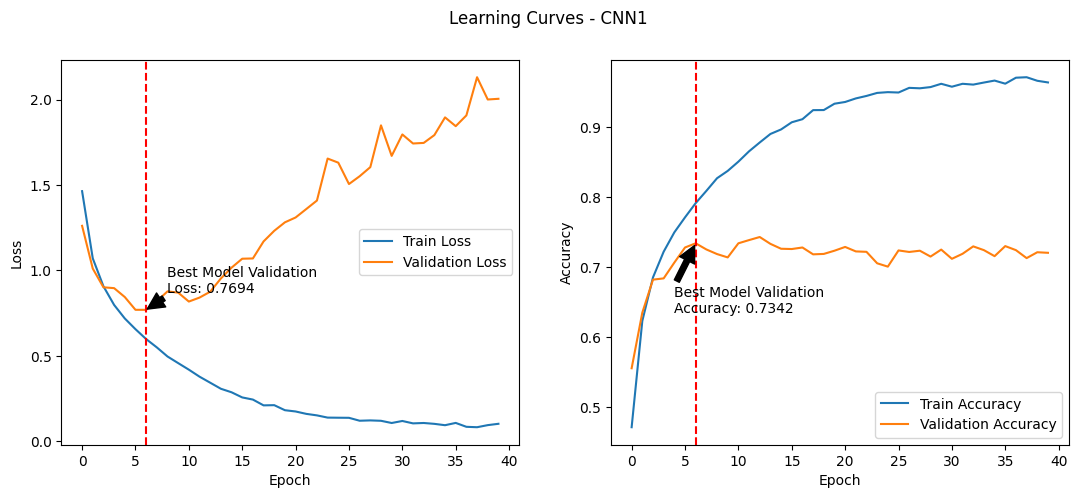

In [ ]:
plt.figure(figsize=(13, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Vertical line at the best epoch
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nLoss: {best_val_loss:.4f}',
             xy=(best_epoch, best_val_loss),
             xytext=(best_epoch + 2, best_val_loss + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nAccuracy: {best_val_accuracy:.4f}',
             xy=(best_epoch, best_val_accuracy),
             xytext=(best_epoch - 2, best_val_accuracy - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.suptitle('Learning Curves - CNN1')
plt.show()

<a name='CNN1---Evaluation'></a>
### CNN1 - Evaluation

In [ ]:
# Load the model
CNN1_checkpoint_filepath = base_path + 'Models/CNN1_checkpoint.keras'
CNN1 = keras.models.load_model(CNN1_checkpoint_filepath)

# Verify the loaded model
loss, acc = CNN1.evaluate(X_test, y_test)
print(f"CNN1 accuracy on test data: {acc * 100:.2f}%")

313/313 [==============================] - 3s 10ms/step - loss: 0.8166 - accuracy: 0.7275
CNN1 accuracy on test data: 72.75%


In [ ]:
# Predict the probabilities for the test data
y_pred_prob = CNN1.predict(X_test)

313/313 [==============================] - 4s 11ms/step


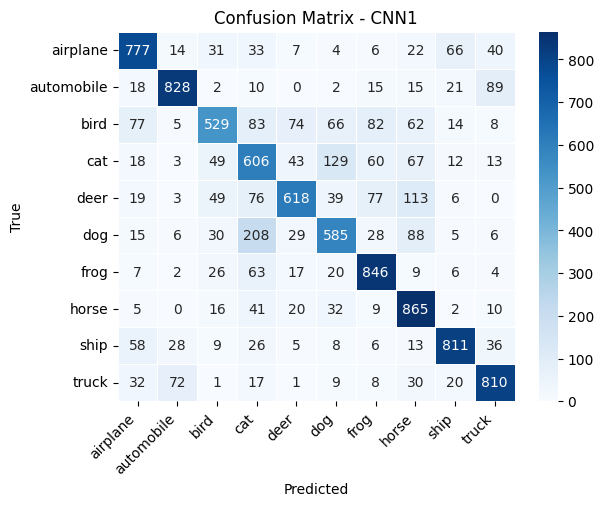

In [ ]:
# Convert predictions and true labels to integer labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names, linewidth=.5)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45 degrees
plt.title("Confusion Matrix - CNN1")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<a name='Improved-CNN---CNN2'></a>
## Improved CNN - CNN2

This architecture enhances the initial model by incorporating several improvements in order to achieve better performance and reduce overfitting.

It consists of:
* Four **convolutional blocks**, each with a convolutional layer that has an increasing number of filters [32, 64, 128, 256];
* **kernel regularizer (L2)** to prevent overfitting.
* **Batch normalization** follows each convolutional layer to stabilize and accelerate training.
* **ReLU activation**;
* **max pooling** layers with a pool size of (2, 2) to reduce spatial dimensions;
* **Dropout** layers with rates of 0.3 are added after each max pooling layer to further prevent overfitting.

The fourth convolutional block culminates in a **Global max pooling** layer. The model then has two dense layers, with 128 and 64 neurons respectively, each followed by a 0.5 dropout for regularization. The final dense layer has 10 (`num_classes`) neurons with softmax activation for classification.

<a name='CNN2---Definition'></a>
### CNN2 - Definition

In [ ]:
def create_model(input_shape, num_classes):
    inputs = keras.Input(input_shape)
    x = inputs

    # First Convolutional Block
    x = keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Dropout(0.3)(x)

    # Second Convolutional Block
    x = keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Dropout(0.3)(x)

    # Third Convolutional Block
    x = keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Dropout(0.3)(x)

    # Fourth Convolutional Block
    x = keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.GlobalMaxPooling2D()(x)

    # Dense Layers
    x = keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = keras.layers.Dropout(0.5)(x)

    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name='CNN2')
    return model

In [ ]:
CNN2 = create_model(input_shape, num_classes)
CNN2.summary()

Model: "CNN2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0      

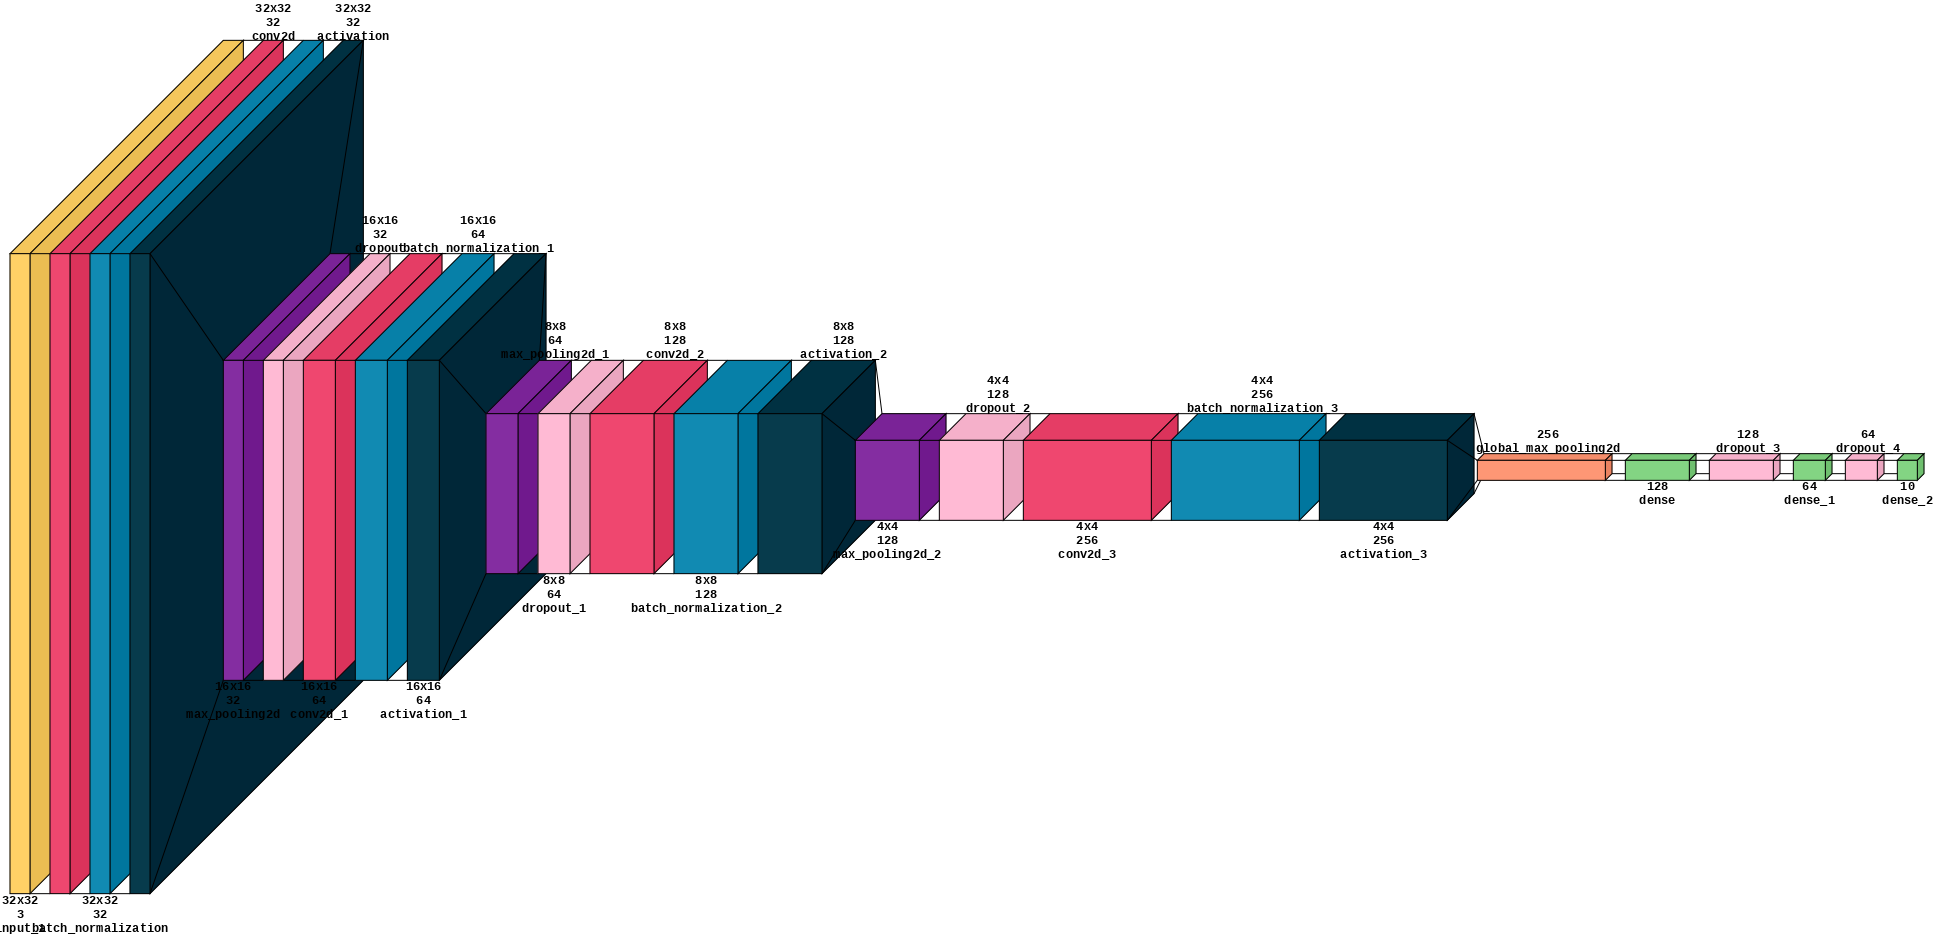

In [ ]:
# 3D Visualization
try:
    font = ImageFont.truetype("LiberationMono-Bold.ttf", 12)  # You can change the font and size here
except OSError:
    font = None

def text_callable(layer_index, layer):
    # Every other piece of text is drawn above the layer, the first one below
    above = bool(layer_index%2)

    # Get the output shape of the layer
    output_shape = [x for x in list(layer.output_shape) if x is not None]

    # If the output shape is a list of tuples, we only take the first one
    if isinstance(output_shape[0], tuple):
        output_shape = list(output_shape[0])
        output_shape = [x for x in output_shape if x is not None]

    # Variable to store text which will be drawn
    output_shape_txt = ""

    # Create a string representation of the output shape
    for ii in range(len(output_shape)):
        output_shape_txt += str(output_shape[ii])
        if ii < len(output_shape) - 2: # Add an x between dimensions, e.g. 3x3
            output_shape_txt += "x"
        if ii == len(output_shape) - 2: # Add a newline between the last two dimensions, e.g. 3x3 \n 64
            output_shape_txt += "\n"

    # Add the name of the layer to the text, as a new line
    output_shape_txt += f"\n{layer.name}"

    # Return the text value and if it should be drawn above the layer
    return output_shape_txt, above

# Create a VisualKeras class instance
vis = visualkeras.layered_view(CNN2,
                               to_file = base_path + 'Models/CNN1.png',
                               font=font,
                               spacing=20,
                               draw_volume=True,
                               scale_xy=20,
                               scale_z=0.5,
                               text_callable=text_callable)
# Display the visualization
vis

<a name='CNN2---Parameters-and-Callbacks'></a>
### CNN2 - Parameters and Callbacks

In [ ]:
# Hyperparameters
lr = 0.001
epochs = 100
batch_size = 64

# Optimizer, Loss and Metrics
optimizer = keras.optimizers.Adam(learning_rate=lr)
loss_function = keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']

Callbacks

In [ ]:
# Reduce Learning Rate On Plateau
callback_rp = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                factor=0.5,
                                                patience=5,
                                                min_lr=1e-8,
                                                verbose=1)

# Early Stopping
callback_es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True,
                                            verbose=1)

# Model Checkpoint
CNN2_checkpoint_filepath = base_path + 'Models/CNN2_checkpoint.keras'
callback_cp = keras.callbacks.ModelCheckpoint(CNN2_checkpoint_filepath,
                                              monitor='val_loss',
                                              save_best_only=True,
                                              save_weights_only=False,
                                              verbose=1
                                              )

# Backup and Restore
callback_br = keras.callbacks.BackupAndRestore(backup_dir = base_path + "backup/CNN2")

# CSV Logger for history saving
history_CNN2_filepath = base_path + 'backup/history_CNN2.csv'
callback_CVS = keras.callbacks.CSVLogger(history_CNN2_filepath, separator=",", append=True)

callbacks = [callback_rp, callback_es, callback_cp, callback_br, callback_CVS]

Compile Model

In [ ]:
CNN2.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

<a name='CNN2---Training'></a>
### CNN2 - Training

In [ ]:
# Train the model
history_CNN2 = CNN2.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        callbacks=callbacks)

Epoch 1/100
704/704 [==============================] - ETA: 0s - loss: 2.4212 - accuracy: 0.2444
Epoch 1: val_loss improved from inf to 1.96245, saving model to /content/drive/MyDrive/Deep Learning/Project/Models/CNN2_checkpoint.keras
704/704 [==============================] - 27s 19ms/step - loss: 2.4212 - accuracy: 0.2444 - val_loss: 1.9625 - val_accuracy: 0.3890 - lr: 0.0010
Epoch 2/100
703/704 [============================>.] - ETA: 0s - loss: 1.9773 - accuracy: 0.3496
Epoch 2: val_loss improved from 1.96245 to 1.78181, saving model to /content/drive/MyDrive/Deep Learning/Project/Models/CNN2_checkpoint.keras
704/704 [==============================] - 11s 15ms/step - loss: 1.9772 - accuracy: 0.3496 - val_loss: 1.7818 - val_accuracy: 0.4344 - lr: 0.0010
Epoch 3/100
704/704 [==============================] - ETA: 0s - loss: 1.8034 - accuracy: 0.4063
Epoch 3: val_loss improved from 1.78181 to 1.54934, saving model to /content/drive/MyDrive/Deep Learning/Project/Models/CNN2_checkpoint.k

In [ ]:
# Load the CSV file
history_df = pd.read_csv(history_CNN2_filepath)

In [ ]:
best_epoch = history_df['val_loss'].idxmin()
best_val_loss = history_df['val_loss'].min()
best_val_accuracy = history_df['val_accuracy'].iloc[best_epoch]

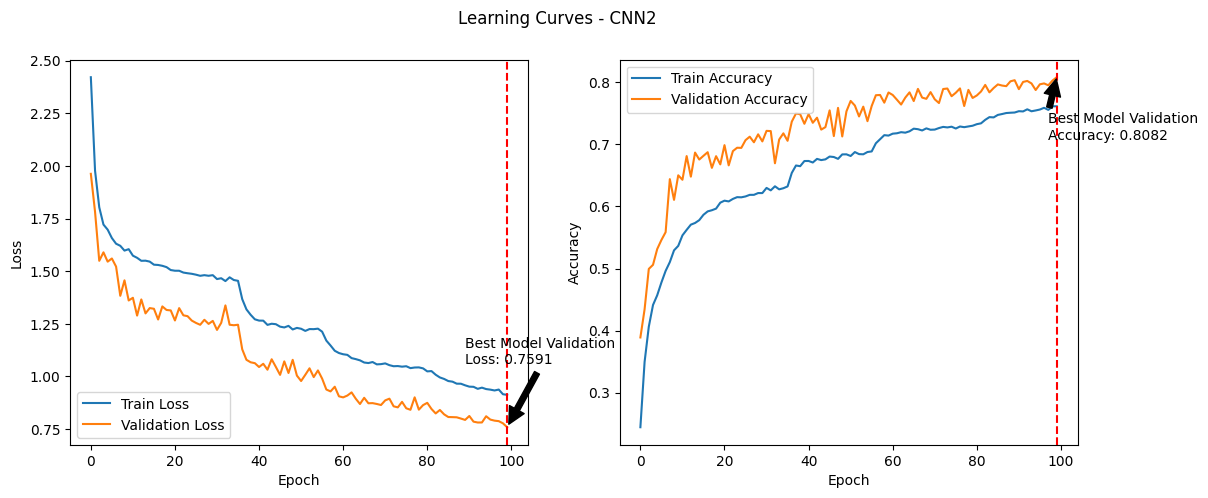

In [ ]:
plt.figure(figsize=(13, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Vertical line at the best epoch
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nLoss: {best_val_loss:.4f}',
             xy=(best_epoch, best_val_loss),
             xytext=(best_epoch - 10, best_val_loss + 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nAccuracy: {best_val_accuracy:.4f}',
             xy=(best_epoch, best_val_accuracy),
             xytext=(best_epoch - 2, best_val_accuracy - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.suptitle('Learning Curves - CNN2')
plt.show()

<a name='CNN2---Evaluation'></a>
### CNN2 - Evaluation

In [ ]:
# Load the model
CNN2_checkpoint_filepath = base_path + 'Models/CNN2_checkpoint.keras'
CNN2 = keras.models.load_model(CNN2_checkpoint_filepath)

# Verify the loaded model
loss, acc = CNN2.evaluate(X_test, y_test)
print(f"CNN2 accuracy on test data: {acc * 100:.2f}%")

313/313 [==============================] - 2s 4ms/step - loss: 0.7564 - accuracy: 0.8088
CNN2 accuracy on test data: 80.88%


In [ ]:
# Predict the probabilities for the test data
y_pred_prob = CNN2.predict(X_test)

313/313 [==============================] - 1s 2ms/step


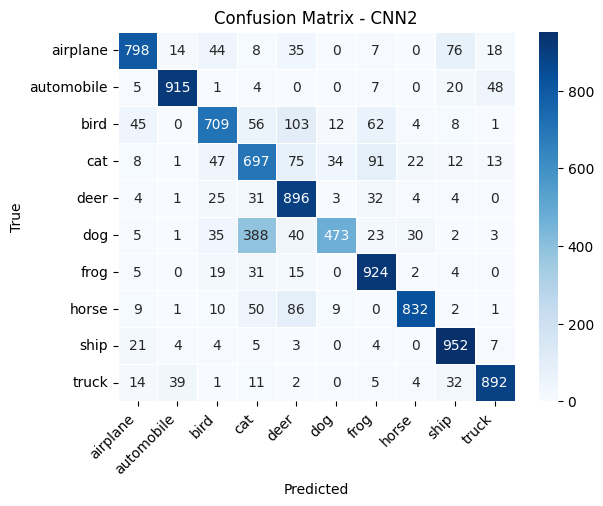

In [ ]:
# Convert predictions and true labels to integer labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names, linewidth=.5)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45 degrees
plt.title("Confusion Matrix - CNN2")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<a name='Residual-Network---res_model'></a>
## Residual Network - res_model

This architecture leads to relevant improvements with respect to previous models by incorporating **Residual Blocks**, which help in training deeper networks effectively by mitigating the *vanishing gradient* problem. The model starts with an initial convolutional layer followed by batch normalization and ReLU activation for feature extraction. It then incorporates four sets of residual blocks with an increasing number of filters [32, 64, 128, 256]. Each residual block consists of two convolutional layers with kernel regularization (L2), batch normalization, and ReLU activation. The **shortcut connections**, which are convolutional (for dimensionality matching), enhance gradient flow and model performance. After certain residual blocks, max pooling layers with a pool size of (2, 2) are used to reduce spatial dimensions. The network ends with a global max pooling layer followed by two dense layers with 128 and 64 neurons, respectively, both with an increased dropout rate of 0.6 for robust regularization. The final dense layer uses softmax activation for classification into 10 classes.

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
num_classes = y_train.shape[1]
print(f"Input shape:\t\t{input_shape}\nNumber of classes:\t{num_classes}")

Input shape:		(32, 32, 3)
Number of classes:	10


<a name='res_model---Definition'></a>
### res_model - Definition

In [ ]:
def residual_block(x, filters, kernel_size=3, stride=1, conv_shortcut=False):
    shortcut = x
    if conv_shortcut:
        shortcut = keras.layers.Conv2D(filters, 1, strides=stride, padding='same',
                                       kernel_regularizer=keras.regularizers.l2(0.001))(x)
        shortcut = keras.layers.BatchNormalization()(shortcut)

    x = keras.layers.Conv2D(filters, kernel_size, strides=stride, padding='same',
                            kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(filters, kernel_size, padding='same',
                            kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Add()([shortcut, x])
    x = keras.layers.Activation('relu')(x)
    return x

def create_model(input_shape, num_classes):
    inputs = keras.Input(input_shape)

    # Initial Convolutional Layer
    x = keras.layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.001))(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    # Residual Blocks
    x = residual_block(x, 32)
    x = residual_block(x, 32)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = residual_block(x, 64, conv_shortcut=True)
    x = residual_block(x, 64)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = residual_block(x, 128, conv_shortcut=True)
    x = residual_block(x, 128)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = residual_block(x, 256, conv_shortcut=True)
    x = residual_block(x, 256)
    x = keras.layers.GlobalMaxPooling2D()(x)

    # Dense Layers
    x = keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = keras.layers.Dropout(0.6)(x)  # Increased dropout rate
    x = keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = keras.layers.Dropout(0.6)(x)  # Increased dropout rate

    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name='res_model')
    return model

In [ ]:
res_model = create_model(input_shape, num_classes)
res_model.summary()

Model: "res_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 32)           896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 32, 32, 32)           0         ['batch_normalization[

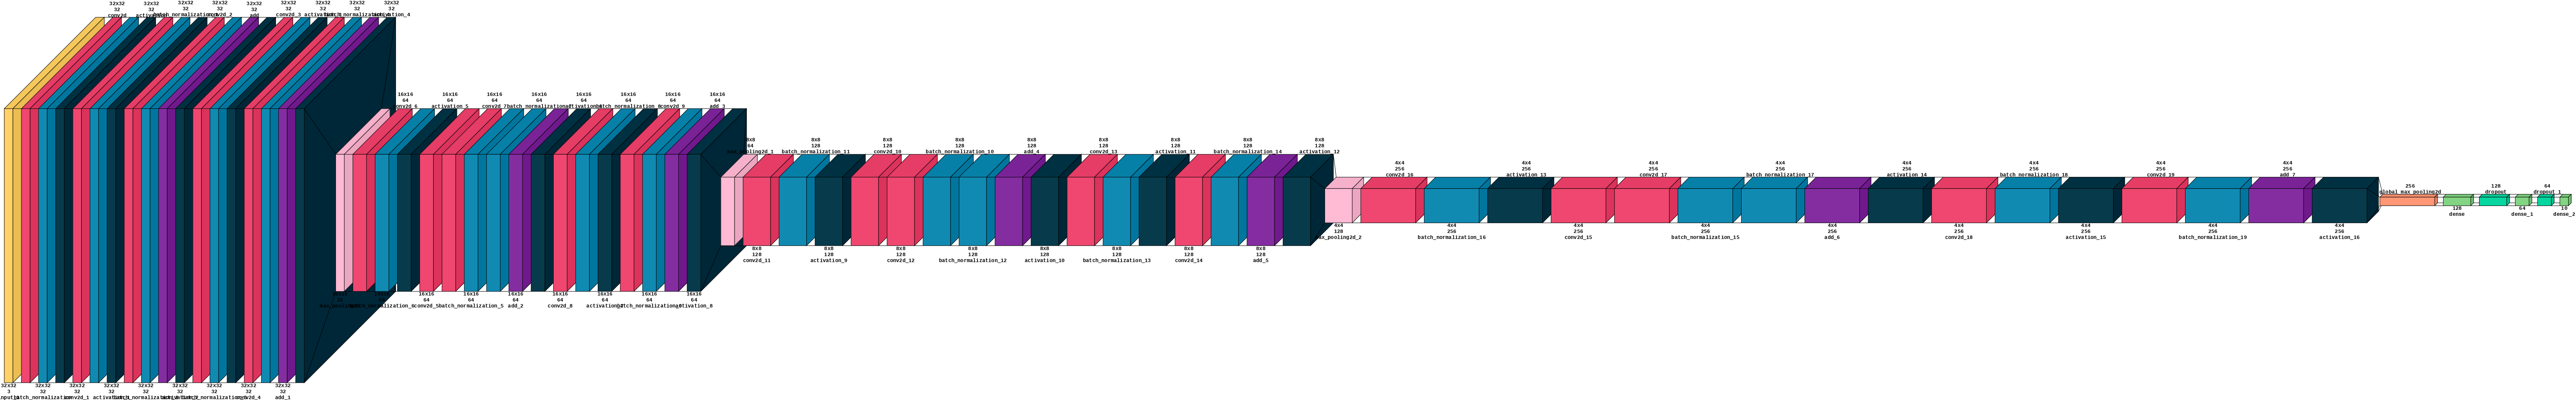

In [ ]:
# 3D Visualization
try:
    font = ImageFont.truetype("LiberationMono-Bold.ttf", 12)  # You can change the font and size here
except OSError:
    font = None

def text_callable(layer_index, layer):
    # Every other piece of text is drawn above the layer, the first one below
    above = bool(layer_index%2)

    # Get the output shape of the layer
    output_shape = [x for x in list(layer.output_shape) if x is not None]

    # If the output shape is a list of tuples, we only take the first one
    if isinstance(output_shape[0], tuple):
        output_shape = list(output_shape[0])
        output_shape = [x for x in output_shape if x is not None]

    # Variable to store text which will be drawn
    output_shape_txt = ""

    # Create a string representation of the output shape
    for ii in range(len(output_shape)):
        output_shape_txt += str(output_shape[ii])
        if ii < len(output_shape) - 2: # Add an x between dimensions, e.g. 3x3
            output_shape_txt += "x"
        if ii == len(output_shape) - 2: # Add a newline between the last two dimensions, e.g. 3x3 \n 64
            output_shape_txt += "\n"

    # Add the name of the layer to the text, as a new line
    output_shape_txt += f"\n{layer.name}"

    # Return the text value and if it should be drawn above the layer
    return output_shape_txt, above

# Create a VisualKeras class instance
vis = visualkeras.layered_view(res_model,
                               to_file = base_path + 'Models/res_model.png',
                               font=font,
                               spacing=20,
                               draw_volume=True,
                               scale_xy=20,
                               scale_z=0.5,
                               text_callable=text_callable)
# Display the visualization
vis

<a name='res_model---Parameters-and-Callbacks'></a>
### res_model - Parameters and Callbacks

In [ ]:
# Hyperparameters
lr = 0.001
epochs = 100
batch_size = 64

# Optimizer, Loss and Metrics
optimizer = keras.optimizers.Adam(learning_rate=lr)
loss_function = keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']

Callbacks

In [ ]:
# Reduce Learning Rate On Plateau
callback_rp = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                factor=0.5,
                                                patience=5,
                                                min_lr=1e-8,
                                                verbose=1)

# Early Stopping
callback_es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True,
                                            verbose=1)

# Model Checkpoint
res_model_checkpoint_filepath = base_path + 'Models/res_model_checkpoint.keras'
callback_cp = keras.callbacks.ModelCheckpoint(res_model_checkpoint_filepath,
                                              monitor='val_loss',
                                              save_best_only=True,
                                              save_weights_only=False,
                                              verbose=1
                                              )

# Backup and Restore
callback_br = keras.callbacks.BackupAndRestore(backup_dir = base_path + "backup/res_model")

# CSV Logger for history saving
history_res_model_filepath = base_path + 'backup/history_res_model.csv'
callback_CVS = keras.callbacks.CSVLogger(history_res_model_filepath, separator=",", append=True)

callbacks = [callback_rp, callback_es, callback_cp, callback_br, callback_CVS]

Compile Model

In [ ]:
res_model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

<a name='res_model---Training'></a>
### res_model - Training

In [ ]:
# Train the model
history_res_model = res_model.fit(X_train, y_train,
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  validation_data=(X_val, y_val),
                                  callbacks=callbacks)

Epoch 1/100
704/704 [==============================] - ETA: 0s - loss: 4.0311 - accuracy: 0.1605
Epoch 1: val_loss improved from inf to 3.10832, saving model to /content/drive/MyDrive/Deep Learning/Project/Models/res_model_checkpoint.keras
704/704 [==============================] - 41s 32ms/step - loss: 4.0311 - accuracy: 0.1605 - val_loss: 3.1083 - val_accuracy: 0.2508 - lr: 0.0010
Epoch 2/100
703/704 [============================>.] - ETA: 0s - loss: 2.7036 - accuracy: 0.2556
Epoch 2: val_loss improved from 3.10832 to 2.29700, saving model to /content/drive/MyDrive/Deep Learning/Project/Models/res_model_checkpoint.keras
704/704 [==============================] - 22s 31ms/step - loss: 2.7035 - accuracy: 0.2556 - val_loss: 2.2970 - val_accuracy: 0.2854 - lr: 0.0010
Epoch 3/100
703/704 [============================>.] - ETA: 0s - loss: 2.1737 - accuracy: 0.2944
Epoch 3: val_loss improved from 2.29700 to 2.11276, saving model to /content/drive/MyDrive/Deep Learning/Project/Models/res_mod

In [ ]:
# Load the CSV file
history_df = pd.read_csv(history_res_model_filepath)

In [ ]:
best_epoch = history_df['val_loss'].idxmin()
best_val_loss = history_df['val_loss'].min()
best_val_accuracy = history_df['val_accuracy'].iloc[best_epoch]

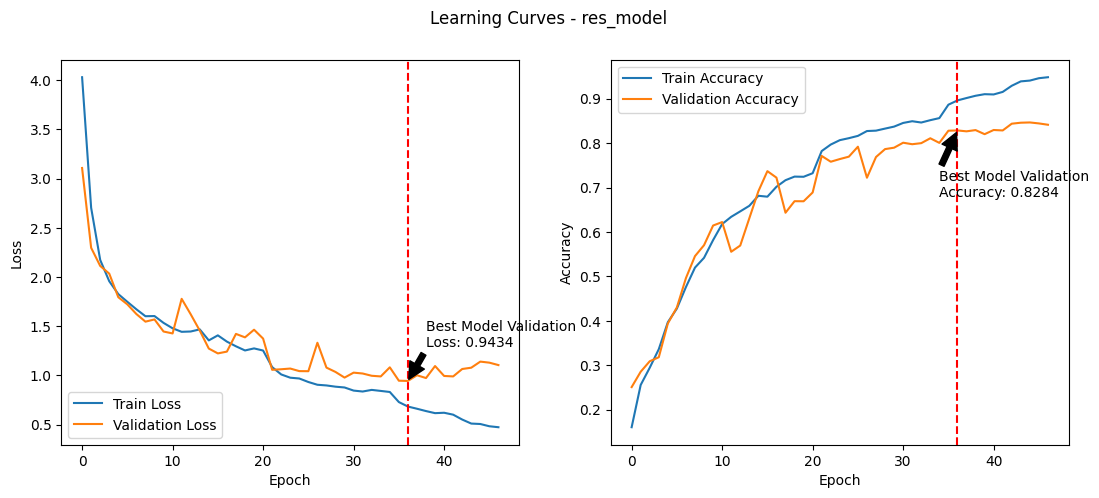

In [ ]:
plt.figure(figsize=(13, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Vertical line at the best epoch
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nLoss: {best_val_loss:.4f}',
             xy=(best_epoch, best_val_loss),
             xytext=(best_epoch + 2, best_val_loss + 0.35),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nAccuracy: {best_val_accuracy:.4f}',
             xy=(best_epoch, best_val_accuracy),
             xytext=(best_epoch - 2, best_val_accuracy - 0.15),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.suptitle('Learning Curves - res_model')
plt.show()

<a name='res_model---Evaluation'></a>
### res_model - Evaluation

In [ ]:
# Load the model
res_model_checkpoint_filepath = base_path + 'Models/res_model_checkpoint.keras'
res_model = keras.models.load_model(res_model_checkpoint_filepath)

# Verify the loaded model
loss, acc = res_model.evaluate(X_test, y_test)
print(f"res_model accuracy on test data: {acc * 100:.2f}%")

313/313 [==============================] - 74s 232ms/step - loss: 0.9794 - accuracy: 0.8289
res_model accuracy on test data: 82.89%


In [ ]:
# Predict the probabilities for the test data
y_pred_prob = res_model.predict(X_test)

313/313 [==============================] - 75s 239ms/step


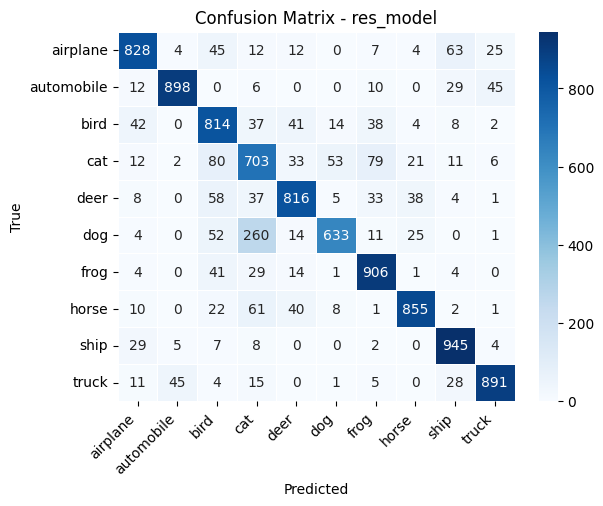

In [ ]:
# Convert predictions and true labels to integer labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names, linewidth=.5)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45 degrees
plt.title("Confusion Matrix - res_model")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<a name='Data-Augmentation'></a>
## Data Augmentation

In this phase, we enhance the model's performance and robustness by applying data augmentation techniques. Using the `ImageDataGenerator` class from the *Keras* library, we apply different augmentation transformations to artificially expand the training dataset. These techniques help the model generalize better by providing more varied training examples, also it helps prevent overfitting.

We perform the following transformations:

* **Rotation**: Randomly rotate images by up to 15 degrees;
* **Width Shift**: Randomly shift images horizontally by up to 10% of the image width;
* **Height Shift**: Randomly shift images vertically by up to 10% of the image height;
* **Shear**: Apply shear transformations with a maximum shear intensity of 10%;
* **Zoom**: Randomly zoom into images by up to 10%;
* **Horizontal Flip**: Randomly flip images horizontally.

We will train the exact same architecture on the augmented data to have a more objective view on the improvements introduced by the augmentation.

In [ ]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,       # randomly rotate images by 15 degrees
    width_shift_range=0.1,   # randomly shift images horizontally by up to 10%
    height_shift_range=0.1,  # randomly shift images vertically by up to 10%
    shear_range=0.1,         # randomly apply shear transformation with a maximum shear intensity of 10%
    zoom_range=0.1,          # randomly zoom into images by up to 10%
    horizontal_flip=True,    # randomly flip images horizontally
    fill_mode='nearest'      # fill in newly created pixels after rotation or width/height shift
)

Below we show some examples of possible transformations applied to the dataset.

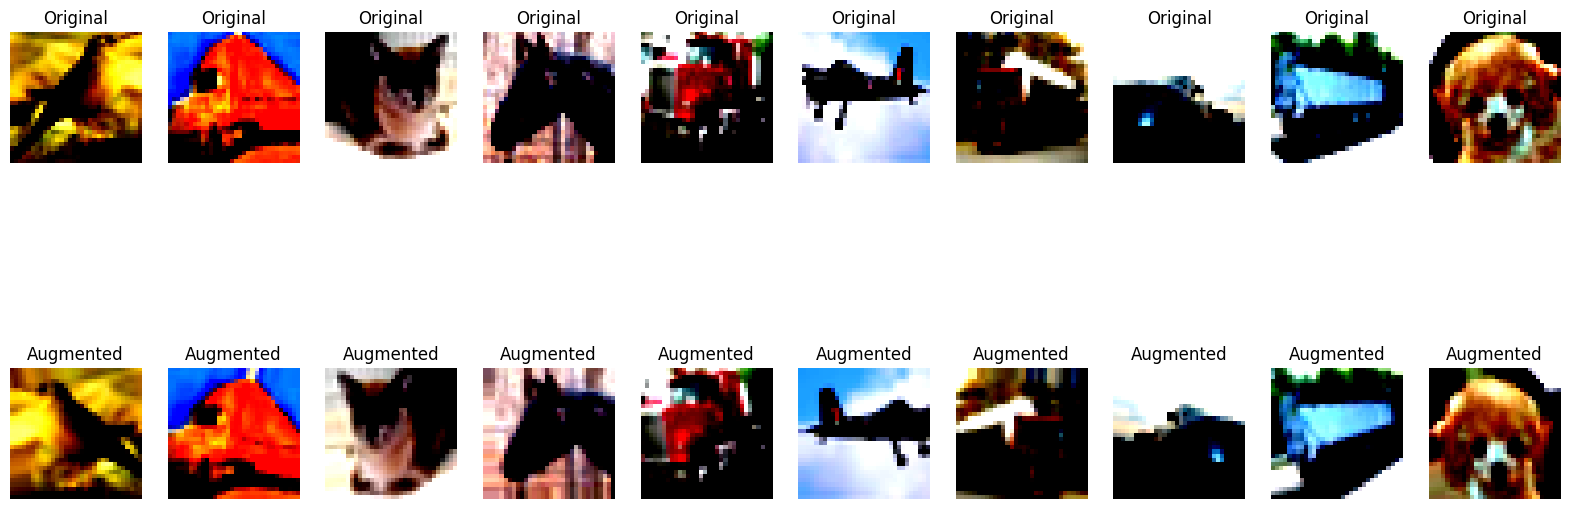

In [ ]:
# Generate augmented images from the training data
augmented_images = next(datagen.flow(X_train, y_train, batch_size=20, shuffle=False))

# Clip the values to ensure they are within the valid range
X_train_normalized = np.clip(X_train, 0, 1)
augmented_images_normalized = np.clip(augmented_images[0], 0, 1)

# Plot original and augmented images
plt.figure(figsize=(20, 8))
for i in range(10):
    # Plot original image
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_train_normalized[i], cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Plot augmented image
    plt.subplot(2, 10, i + 11)
    plt.imshow(augmented_images_normalized[i], cmap='gray')
    plt.title('Augmented')
    plt.axis('off')

plt.show()


In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
num_classes = y_train.shape[1]
print(f"Input shape:\t\t{input_shape}\nNumber of classes:\t{num_classes}")

Input shape:		(32, 32, 3)
Number of classes:	10


<a name='res_model_aug---Definition'></a>
### res_model_aug - Definition

In [ ]:
def residual_block(x, filters, kernel_size=3, stride=1, conv_shortcut=False):
    shortcut = x
    if conv_shortcut:
        shortcut = keras.layers.Conv2D(filters, 1, strides=stride, padding='same',
                                       kernel_regularizer=keras.regularizers.l2(0.001))(x)
        shortcut = keras.layers.BatchNormalization()(shortcut)

    x = keras.layers.Conv2D(filters, kernel_size, strides=stride, padding='same',
                            kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(filters, kernel_size, padding='same',
                            kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Add()([shortcut, x])
    x = keras.layers.Activation('relu')(x)
    return x

def create_model(input_shape, num_classes):
    inputs = keras.Input(input_shape)

    # Initial Convolutional Layer
    x = keras.layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(0.001))(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    # Residual Blocks
    x = residual_block(x, 32)
    x = residual_block(x, 32)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = residual_block(x, 64, conv_shortcut=True)
    x = residual_block(x, 64)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = residual_block(x, 128, conv_shortcut=True)
    x = residual_block(x, 128)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = residual_block(x, 256, conv_shortcut=True)
    x = residual_block(x, 256)
    x = keras.layers.GlobalMaxPooling2D()(x)

    # Dense Layers
    x = keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = keras.layers.Dropout(0.6)(x)
    x = keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = keras.layers.Dropout(0.6)(x)

    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name='res_model_aug')
    return model

In [ ]:
res_model_aug = create_model(input_shape, num_classes)
res_model_aug.summary()

Model: "res_model_aug"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 32)           896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 32, 32, 32)           0         ['batch_normalizat

<a name='res_model_aug---Parameters-and-Callbacks'></a>
### res_model_aug - Parameters and Callbacks

In [ ]:
# Hyperparameters
lr = 0.001
epochs = 100
batch_size = 64

# Optimizer, Loss and Metrics
optimizer = keras.optimizers.Adam(learning_rate=lr)
loss_function = keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']

Callbacks

In [ ]:
# Reduce Learning Rate On Plateau
callback_rp = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                factor=0.5,
                                                patience=5,
                                                min_lr=1e-8,
                                                verbose=1)

# Early Stopping
callback_es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True,
                                            verbose=1)

# Model Checkpoint
res_model_aug_checkpoint_filepath = base_path + 'Models/res_model_aug_checkpoint.keras'
callback_cp = keras.callbacks.ModelCheckpoint(res_model_aug_checkpoint_filepath,
                                              monitor='val_loss',
                                              save_best_only=True,
                                              save_weights_only=False,
                                              verbose=1
                                              )

# Backup and Restore
callback_br = keras.callbacks.BackupAndRestore(backup_dir = base_path + "backup/res_model_aug")

# CSV Logger for history saving
history_res_model_aug_filepath = base_path + 'backup/history_res_model_aug.csv'
callback_CVS = keras.callbacks.CSVLogger(history_res_model_aug_filepath, separator=",", append=True)

callbacks = [callback_rp, callback_es, callback_cp, callback_br, callback_CVS]

Compile Model

In [ ]:
res_model_aug.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

<a name='res_model_aug---Training'></a>
### res_model_aug - Training

By using `datagen.flow`, each batch of data fed into the model during training will be augmented on the fly, in this way we don't need to modify the original dataset with the augmented data.

In [ ]:
# Train the model
history_res_model_aug= res_model_aug.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                                         epochs=epochs,
                                         steps_per_epoch=len(X_train) // batch_size,
                                         validation_data=(X_val, y_val),
                                         callbacks=callbacks)

Epoch 1/100
703/703 [==============================] - ETA: 0s - loss: 4.0372 - accuracy: 0.1615
Epoch 1: val_loss improved from inf to 3.15106, saving model to /content/drive/MyDrive/Deep Learning/Models/res_model_aug_checkpoint.keras
703/703 [==============================] - 65s 57ms/step - loss: 4.0372 - accuracy: 0.1615 - val_loss: 3.1511 - val_accuracy: 0.2298 - lr: 0.0010
Epoch 2/100
702/703 [============================>.] - ETA: 0s - loss: 2.7530 - accuracy: 0.2405
Epoch 2: val_loss improved from 3.15106 to 2.19624, saving model to /content/drive/MyDrive/Deep Learning/Models/res_model_aug_checkpoint.keras
703/703 [==============================] - 38s 54ms/step - loss: 2.7525 - accuracy: 0.2407 - val_loss: 2.1962 - val_accuracy: 0.3362 - lr: 0.0010
Epoch 3/100
702/703 [============================>.] - ETA: 0s - loss: 2.1916 - accuracy: 0.3119
Epoch 3: val_loss improved from 2.19624 to 2.04613, saving model to /content/drive/MyDrive/Deep Learning/Models/res_model_aug_checkpoin

In [ ]:
# Load the CSV file
history_df = pd.read_csv(history_res_model_aug_filepath)

In [ ]:
best_epoch = history_df['val_loss'].idxmin()
best_val_loss = history_df['val_loss'].min()
best_val_accuracy = history_df['val_accuracy'].iloc[best_epoch]

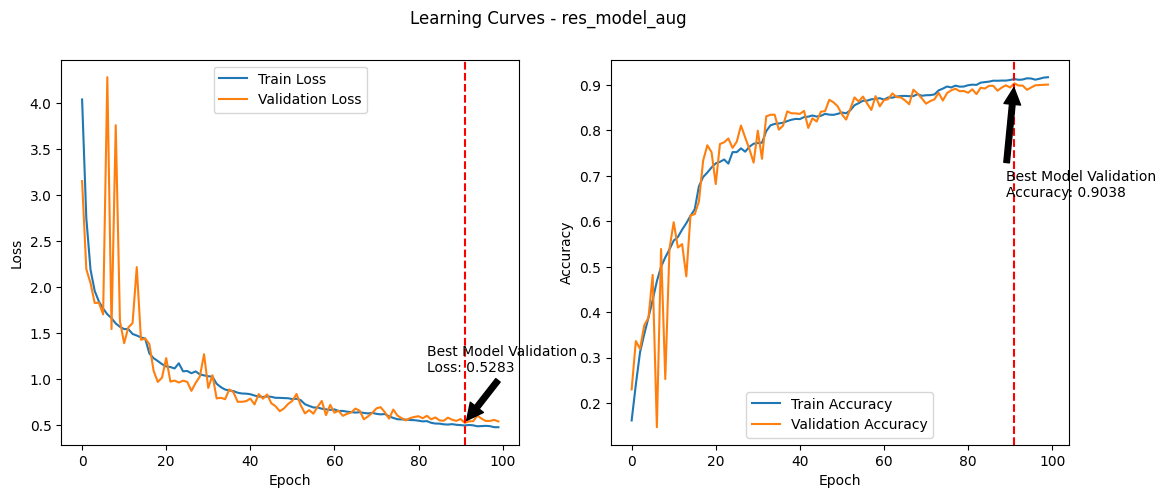

In [ ]:
plt.figure(figsize=(13, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Vertical line at the best epoch
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nLoss: {best_val_loss:.4f}',
             xy=(best_epoch, best_val_loss),
             xytext=(best_epoch - 9, best_val_loss + 0.55),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nAccuracy: {best_val_accuracy:.4f}',
             xy=(best_epoch, best_val_accuracy),
             xytext=(best_epoch - 2, best_val_accuracy - 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.suptitle('Learning Curves - res_model_aug')
plt.show()

<a name='res_model_aug---Evaluation'></a>
### res_model_aug - Evaluation

In [ ]:
# Load the model
res_model_aug_checkpoint_filepath = base_path + 'Models/res_model_aug_checkpoint.keras'
res_model_aug = keras.models.load_model(res_model_aug_checkpoint_filepath)

# Verify the loaded model
loss, acc = res_model_aug.evaluate(X_test, y_test)
print(f"res_model_aug accuracy on test data: {acc * 100:.2f}%")

313/313 [==============================] - 4s 8ms/step - loss: 0.5611 - accuracy: 0.8986
res_model_aug accuracy on test data: 89.86%


In [ ]:
# Predict the probabilities for the test data
y_pred_prob = res_model_aug.predict(X_test)

313/313 [==============================] - 2s 5ms/step


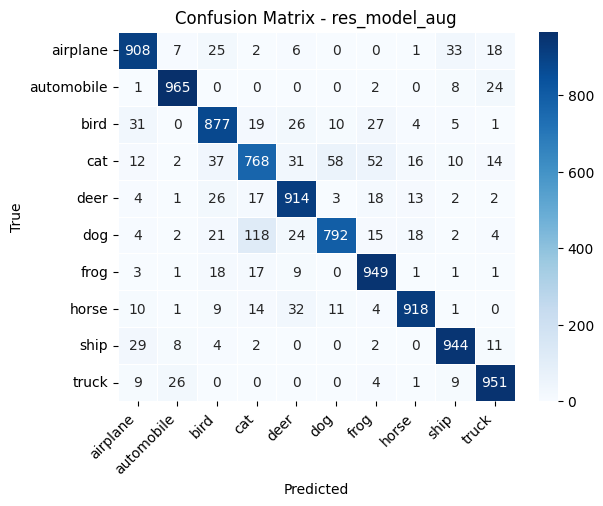

In [ ]:
# Convert predictions and true labels to integer labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names, linewidth=.5)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45 degrees
plt.title("Confusion Matrix - res_model_aug")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<a name='Transfer-Learning---tl_ResNet50v2'></a>
## Transfer Learning -  tl_ResNet50v2

In this step, we implement **Transfer Learning** using the **[ResNet50V2](https://keras.io/api/applications/resnet/#resnet50v2-function:~:text=%5Bsource%5D-,ResNet50V2,-function)** model as a base to enhance performances. By upsampling the input images, we ensure compatibility with the ResNet50V2 input requirements. The base model, pretrained on the [ImageNet](https://www.image-net.org/) dataset, is used freezing its weights during training, in order to transfer its learned features extraction capability to our task. On top of the base model, we add custom layers, including **Global Average Pooling**, to reduce dimensionality of the output of the ResNet50V2, **Dense Layers** with ReLU activation and **L2 Regularization**, and **Dropout** layers to reduce overfitting.

<a name='tl_ResNet50v2---Definition'></a>
### tl_ResNet50v2 - Definition

Loading the base model

In [ ]:
X_train, y_train, X_test, y_test, X_val, y_val = dataloader(batch_files, files_path)

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
num_classes = y_train.shape[1]
print(f"Input shape:\t\t{input_shape}\nNumber of classes:\t{num_classes}")

Input shape:		(32, 32, 3)
Number of classes:	10


In [ ]:
base_model = keras.applications.ResNet50V2(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [ ]:
def create_model(input_shape, num_classes, base_model):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)
    # Preprocess input for Resnet
    x = keras.applications.resnet_v2.preprocess_input(x)

    # Pass through the base model
    x = base_model(x, training=False)

    # Add custom layers on top
    x = keras.layers.GlobalAveragePooling2D()(x)
    # x = tf.keras.layers.Flatten()(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = keras.layers.Dropout(0.2)(x)

    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

    model = keras.models.Model(inputs, outputs, name='tl_ResNet50v2')

    return model

In [ ]:
# Example usage
tl_ResNet50v2 = create_model(input_shape, num_classes, base_model)
tl_ResNet50v2.summary()

Model: "tl_ResNet50v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d (UpSampling2  (None, 224, 224, 3)       0         
 D)                                                              
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                     

<a name='tl_ResNet50v2---Parameters-and-Callbacks'></a>
### tl_ResNet50v2 - Parameters and Callbacks

In [ ]:
# Hyperparameters
lr = 0.001
epochs = 100
batch_size = 64

# Optimizer, Loss and Metrics
optimizer = keras.optimizers.Adam(learning_rate=lr)
loss_function = keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']

Callbacks

In [ ]:
# Reduce Learning Rate On Plateau
callback_rp = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                factor=0.5,
                                                patience=5,
                                                min_lr=1e-8,
                                                verbose=1)

# Early Stopping
callback_es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True,
                                            verbose=1)

# Model Checkpoint
tl_ResNet50v2_checkpoint_filepath = base_path + 'Models/tl_ResNet50v2_checkpoint.keras'
callback_cp = keras.callbacks.ModelCheckpoint(tl_ResNet50v2_checkpoint_filepath,
                                              monitor='val_loss',
                                              save_best_only=True,
                                              save_weights_only=False,
                                              verbose=1
                                              )

# Backup and Restore
callback_br = keras.callbacks.BackupAndRestore(backup_dir = base_path + "backup/tl_ResNet50v2")

# CSV Logger for history saving
history_tl_ResNet50v2_filepath = base_path + 'backup/history_tl_ResNet50v2.csv'
callback_CSV = keras.callbacks.CSVLogger(history_tl_ResNet50v2_filepath, separator=",", append=True)

callbacks = [callback_rp, callback_es, callback_cp, callback_br, callback_CSV]

Compile Model

In [ ]:
tl_ResNet50v2.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

<a name='tl_ResNet50v2---Training'></a>
### tl_ResNet50v2 - Training

In [ ]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,       # randomly rotate images by 15 degrees
    width_shift_range=0.1,   # randomly shift images horizontally by up to 10%
    height_shift_range=0.1,  # randomly shift images vertically by up to 10%
    shear_range=0.1,         # randomly apply shear transformation with a maximum shear intensity of 10%
    zoom_range=0.1,          # randomly zoom into images by up to 10%
    horizontal_flip=True,    # randomly flip images horizontally
    fill_mode='nearest'      # fill in newly created pixels after rotation or width/height shift
)

In [ ]:
# Train the model
history_tl_ResNet50v2 = tl_ResNet50v2.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                                          epochs=epochs,
                                          steps_per_epoch=len(X_train) // batch_size,
                                          validation_data=(X_val, y_val),
                                          callbacks=callbacks)

Epoch 86/100
703/703 [==============================] - ETA: 0s - loss: 0.5334 - accuracy: 0.8409
Epoch 86: val_loss improved from inf to 0.36533, saving model to /content/drive/MyDrive/Deep Learning/Project/Models/tl_ResNet50v2_checkpoint.keras
703/703 [==============================] - 164s 210ms/step - loss: 0.5334 - accuracy: 0.8409 - val_loss: 0.3653 - val_accuracy: 0.8980 - lr: 1.2500e-04
Epoch 87/100
703/703 [==============================] - ETA: 0s - loss: 0.5299 - accuracy: 0.8424
Epoch 87: val_loss improved from 0.36533 to 0.35443, saving model to /content/drive/MyDrive/Deep Learning/Project/Models/tl_ResNet50v2_checkpoint.keras
703/703 [==============================] - 140s 199ms/step - loss: 0.5299 - accuracy: 0.8424 - val_loss: 0.3544 - val_accuracy: 0.9000 - lr: 1.2500e-04
Epoch 88/100
703/703 [==============================] - ETA: 0s - loss: 0.5328 - accuracy: 0.8425
Epoch 88: val_loss did not improve from 0.35443
703/703 [==============================] - 141s 200ms/

In [ ]:
# Load the CSV file
history_df = pd.read_csv(history_tl_ResNet50v2_filepath)

In [ ]:
best_epoch = history_df['val_loss'].idxmin()
best_val_loss = history_df['val_loss'].min()
best_val_accuracy = history_df['val_accuracy'].iloc[best_epoch]

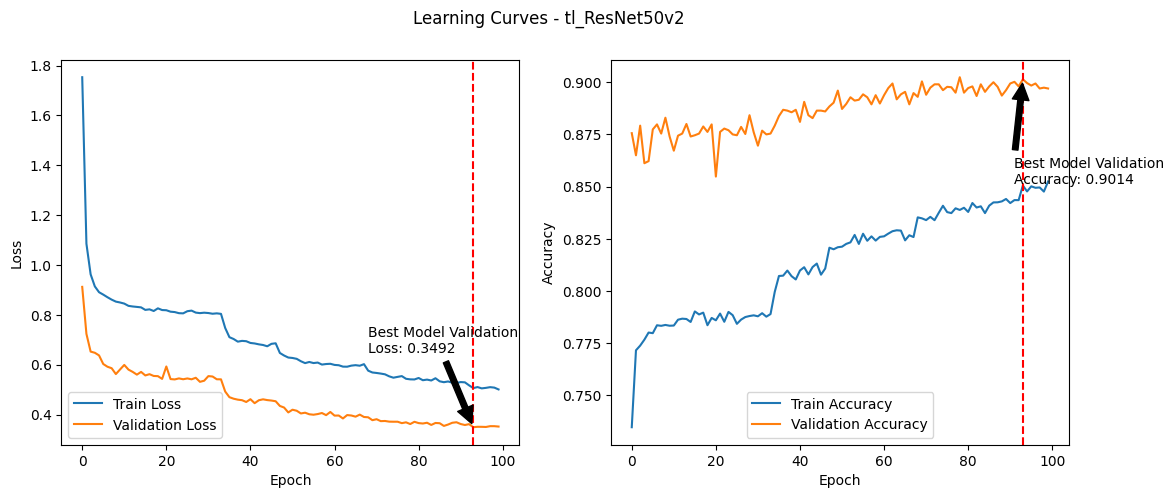

In [ ]:
plt.figure(figsize=(13, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Vertical line at the best epoch
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nLoss: {best_val_loss:.4f}',
             xy=(best_epoch, best_val_loss),
             xytext=(best_epoch - 25, best_val_loss + 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nAccuracy: {best_val_accuracy:.4f}',
             xy=(best_epoch, best_val_accuracy),
             xytext=(best_epoch - 2, best_val_accuracy - 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.suptitle('Learning Curves - tl_ResNet50v2')
plt.show()

<a name='tl_ResNet50v2_ft---Fine-Tuning'></a>
### tl_ResNet50v2_ft - Fine Tuning

After training the model and getting near to convergence, we gave a round of **Fine Tuning**, by unfreezing all parts of the base model and retraining whole model end-to-end with a very low learning rate to obtain further improvements on performances.

In [ ]:
tl_ResNet50v2_checkpoint_filepath = base_path + 'Models/tl_ResNet50v2_checkpoint.keras'
tl_ResNet50v2_ft = tf.keras.models.load_model(tl_ResNet50v2_checkpoint_filepath)

In [ ]:
# Unfreeze the base model
tl_ResNet50v2_ft.trainable = True

In [ ]:
# Hyperparameters
lr = 1e-5
epochs = 15
batch_size = 64

# Optimizer, Loss and Metrics
optimizer = keras.optimizers.Adam(learning_rate=lr)
loss_function = keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']

In [ ]:
# Reduce Learning Rate On Plateau
callback_rp = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                factor=0.5,
                                                patience=5,
                                                min_lr=1e-8,
                                                verbose=1)

# Early Stopping
callback_es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True,
                                            verbose=1)

# Model Checkpoint
tl_ResNet50v2_ft_checkpoint_filepath = base_path + 'Models/tl_ResNet50v2_ft_checkpoint.keras'
callback_cp = keras.callbacks.ModelCheckpoint(tl_ResNet50v2_ft_checkpoint_filepath,
                                              monitor='val_loss',
                                              save_best_only=True,
                                              save_weights_only=False,
                                              verbose=1
                                              )

# Backup and Restore
callback_br = keras.callbacks.BackupAndRestore(backup_dir = base_path + "backup/tl_ResNet50v2_ft")

# CSV Logger for history saving
history_tl_ResNet50v2_ft_filepath = base_path + 'backup/history_tl_ResNet50v2_ft.csv'
callback_CSV = keras.callbacks.CSVLogger(history_tl_ResNet50v2_ft_filepath, separator=",", append=True)

callbacks = [callback_rp, callback_es, callback_cp, callback_br, callback_CSV]

In [ ]:
tl_ResNet50v2_ft.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)
tl_ResNet50v2_ft.summary()

Model: "tl_ResNet50v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d (UpSampling2  (None, 224, 224, 3)       0         
 D)                                                              
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                     

In [ ]:
# Train end-to-end
history_tl_ResNet50v2_ft = tl_ResNet50v2_ft.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                                                epochs=epochs,
                                                steps_per_epoch=len(X_train) // batch_size,
                                                validation_data=(X_val, y_val),
                                                callbacks=callbacks)

Epoch 1/15
703/703 [==============================] - ETA: 0s - loss: 0.4025 - accuracy: 0.8886
Epoch 1: val_loss improved from inf to 0.25968, saving model to /content/drive/MyDrive/Deep Learning/Project/Models/tl_ResNet50v2_ft_checkpoint.keras
703/703 [==============================] - 454s 597ms/step - loss: 0.4025 - accuracy: 0.8886 - val_loss: 0.2597 - val_accuracy: 0.9372 - lr: 1.0000e-05
Epoch 2/15
703/703 [==============================] - ETA: 0s - loss: 0.3283 - accuracy: 0.9151
Epoch 2: val_loss improved from 0.25968 to 0.24806, saving model to /content/drive/MyDrive/Deep Learning/Project/Models/tl_ResNet50v2_ft_checkpoint.keras
703/703 [==============================] - 424s 604ms/step - loss: 0.3283 - accuracy: 0.9151 - val_loss: 0.2481 - val_accuracy: 0.9446 - lr: 1.0000e-05
Epoch 3/15
703/703 [==============================] - ETA: 0s - loss: 0.2812 - accuracy: 0.9315
Epoch 3: val_loss improved from 0.24806 to 0.24489, saving model to /content/drive/MyDrive/Deep Learning

In [ ]:
# Load the CSV file
history_df = pd.read_csv(history_tl_ResNet50v2_ft_filepath)

In [ ]:
best_epoch = history_df['val_loss'].idxmin()
best_val_loss = history_df['val_loss'].min()
best_val_accuracy = history_df['val_accuracy'].iloc[best_epoch]

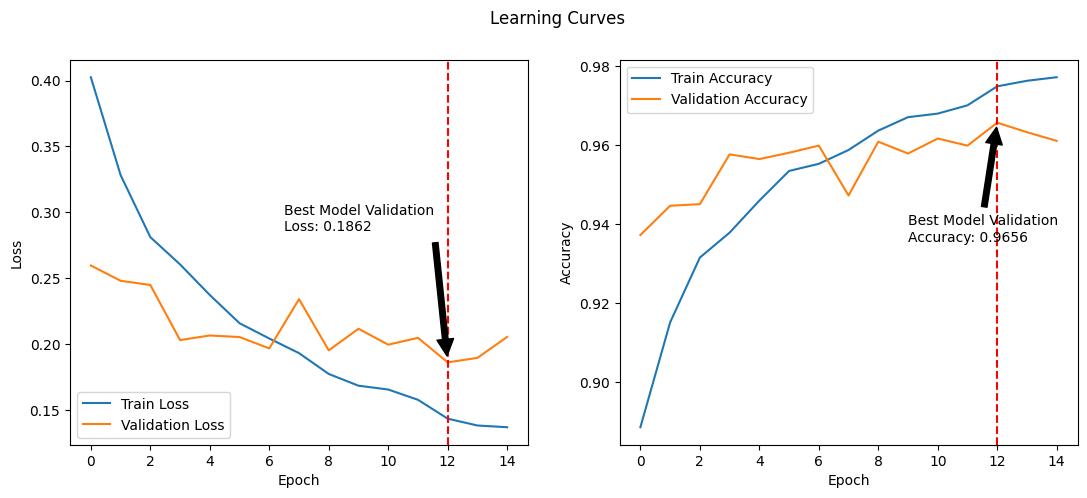

In [ ]:
plt.figure(figsize=(13, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Vertical line at the best epoch
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nLoss: {best_val_loss:.4f}',
             xy=(best_epoch, best_val_loss),
             xytext=(best_epoch - 5.5, best_val_loss + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nAccuracy: {best_val_accuracy:.4f}',
             xy=(best_epoch, best_val_accuracy),
             xytext=(best_epoch - 3, best_val_accuracy - 0.03),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.suptitle('Learning Curves - tl_ResNet50v2_ft')
plt.show()

<a name='tl_ResNet50v2_ft---Evaluation'></a>
### tl_ResNet50v2_ft - Evaluation

In [ ]:
# Load the model
tl_ResNet50v2_ft_checkpoint_filepath = base_path + 'Models/tl_ResNet50v2_ft_checkpoint.keras'
tl_ResNet50v2_ft = keras.models.load_model(tl_ResNet50v2_ft_checkpoint_filepath)

# Verify the loaded model
loss, acc = tl_ResNet50v2_ft.evaluate(X_test, y_test)
print(f"tl_ResNet50v2_ft with Fine Tuning accuracy: {acc * 100:.2f}%")

313/313 [==============================] - 1773s 6s/step - loss: 0.1879 - accuracy: 0.9635
tl_ResNet50v2_ft with Fine Tuning accuracy: 96.35%


In [ ]:
# Predict the probabilities for the test data
y_pred_prob = tl_ResNet50v2_ft.predict(X_test)

313/313 [==============================] - 1767s 6s/step


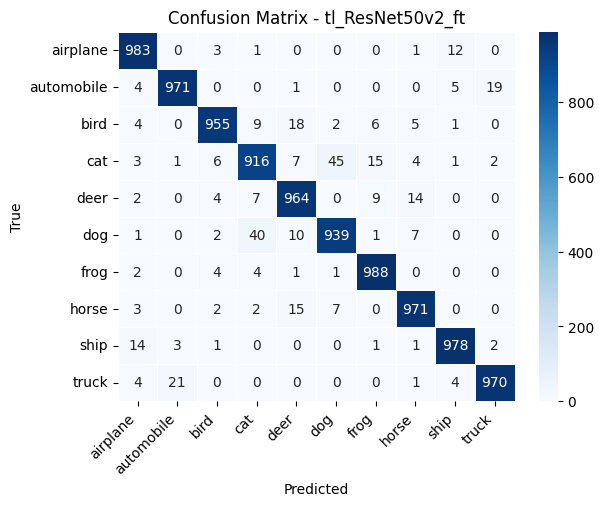

In [ ]:
# Convert predictions and true labels to integer labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names, linewidth=.5)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45 degrees
plt.title("Confusion Matrix - tl_ResNet50v2_ft")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<a name='Transfer-Learning---tl_EfficientNetV2S'></a>
## Transfer Learning - tl_EfficientNetV2S

We Repeated the exact same process by using  [EfficientNetV2](https://keras.io/api/applications/efficientnet_v2/#efficientnetv2s-function:~:text=%5Bsource%5D-,EfficientNetV2S,-function) as base model and we got slightly better performances on the **test data**

<a name='Residual-Network---res_model'></a>
### tl_EfficientNetV2S - Definition

Loading the base model

In [ ]:
X_train, y_train, X_test, y_test, X_val, y_val = dataloader(batch_files, files_path)

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
num_classes = y_train.shape[1]
print(f"Input shape:\t\t{input_shape}\nNumber of classes:\t{num_classes}")

Input shape:		(32, 32, 3)
Number of classes:	10


In [ ]:
base_model = keras.applications.EfficientNetV2S(include_top=False, weights="imagenet", input_shape=(128, 128, 3))

82420632/82420632 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "efficientnetv2-s"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 128, 128, 3)          0         ['input_1[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 64, 64, 24)           648       ['rescaling[0][0]']           
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 64, 64, 24)           96        ['stem_conv[0][0]']           
 n)                                                                                

In [ ]:
def create_model(input_shape, num_classes, base_model):
    inputs = tf.keras.Input(shape=input_shape)
    # Upsample from (32,32) to (128,128)
    x = tf.image.resize(inputs, (128, 128))

    # Preprocess input for Resnet
    x = keras.applications.efficientnet_v2.preprocess_input(x)

    # Pass through the base model
    x = base_model(x, training=False)

    # Custom layers
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = keras.layers.Dropout(0.2)(x)

    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

    model = keras.models.Model(inputs, outputs, name='tl_EfficientNetV2S')

    return model

In [ ]:
# Example usage
tl_EfficientNetV2S = create_model(input_shape, num_classes, base_model)
tl_EfficientNetV2S.summary()

Model: "tl_EfficientNetV2S"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 tf.image.resize (TFOpLambd  (None, 128, 128, 3)       0         
 a)                                                              
                                                                 
 efficientnetv2-s (Function  (None, 4, 4, 1280)        20331360  
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                

<a name='tl_EfficientNetV2S---Parameters-and-Callbacks'></a>
### tl_EfficientNetV2S - Parameters and Callbacks

In [ ]:
# Hyperparameters
lr = 0.001
epochs = 100
batch_size = 64

# Optimizer, Loss and Metrics
optimizer = keras.optimizers.Adam(learning_rate=lr)
loss_function = keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']

Callbacks

In [ ]:
# Reduce Learning Rate On Plateau
callback_rp = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                factor=0.5,
                                                patience=5,
                                                min_lr=1e-8,
                                                verbose=1)

# Early Stopping
callback_es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True,
                                            verbose=1)

# Model Checkpoint
tl_EfficientNetV2S_checkpoint_filepath = base_path + 'Models/tl_EfficientNetV2S_checkpoint.keras'
callback_cp = keras.callbacks.ModelCheckpoint(tl_EfficientNetV2S_checkpoint_filepath,
                                              monitor='val_loss',
                                              save_best_only=True,
                                              save_weights_only=False,
                                              verbose=1
                                              )

# Backup and Restore
callback_br = keras.callbacks.BackupAndRestore(backup_dir = base_path + "backup/tl_EfficientNetV2S")

# CSV Logger for history saving
history_tl_EfficientNetV2S_filepath = base_path + 'backup/history_tl_EfficientNetV2S.csv'
callback_CSV = keras.callbacks.CSVLogger(history_tl_EfficientNetV2S_filepath, separator=",", append=True)

callbacks = [callback_rp, callback_es, callback_cp, callback_br, callback_CSV]

Compile Model

In [ ]:
tl_EfficientNetV2S.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

<a name='tl_EfficientNetV2S---Training'></a>
### tl_EfficientNetV2S - Training

In [ ]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,       # randomly rotate images by 15 degrees
    width_shift_range=0.1,   # randomly shift images horizontally by up to 10%
    height_shift_range=0.1,  # randomly shift images vertically by up to 10%
    shear_range=0.1,         # randomly apply shear transformation with a maximum shear intensity of 10%
    zoom_range=0.1,          # randomly zoom into images by up to 10%
    horizontal_flip=True,    # randomly flip images horizontally
    fill_mode='nearest'      # fill in newly created pixels after rotation or width/height shift
)

In [ ]:
# Train the model
history_tl_EfficientNetV2S = tl_EfficientNetV2S.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                                                    epochs=epochs,
                                                    steps_per_epoch=len(X_train) // batch_size,
                                                    validation_data=(X_val, y_val),
                                                    callbacks=callbacks)

Epoch 85/100
703/703 [==============================] - ETA: 0s - loss: 0.5175 - accuracy: 0.8524
Epoch 85: val_loss improved from inf to 0.38943, saving model to /content/drive/MyDrive/Project/Models/tl_EfficientNetV2S_checkpoint.keras
703/703 [==============================] - 114s 129ms/step - loss: 0.5175 - accuracy: 0.8524 - val_loss: 0.3894 - val_accuracy: 0.8990 - lr: 6.2500e-05
Epoch 86/100
703/703 [==============================] - ETA: 0s - loss: 0.5221 - accuracy: 0.8508
Epoch 86: val_loss improved from 0.38943 to 0.38704, saving model to /content/drive/MyDrive/Project/Models/tl_EfficientNetV2S_checkpoint.keras
703/703 [==============================] - 73s 104ms/step - loss: 0.5221 - accuracy: 0.8508 - val_loss: 0.3870 - val_accuracy: 0.8998 - lr: 6.2500e-05
Epoch 87/100
703/703 [==============================] - ETA: 0s - loss: 0.5230 - accuracy: 0.8495
Epoch 87: val_loss did not improve from 0.38704
703/703 [==============================] - 68s 96ms/step - loss: 0.5230 -

In [ ]:
# Load the CSV file
history_df = pd.read_csv(history_tl_EfficientNetV2S_filepath)

In [ ]:
best_epoch = history_df['val_loss'].idxmin()
best_val_loss = history_df['val_loss'].min()
best_val_accuracy = history_df['val_accuracy'].iloc[best_epoch]

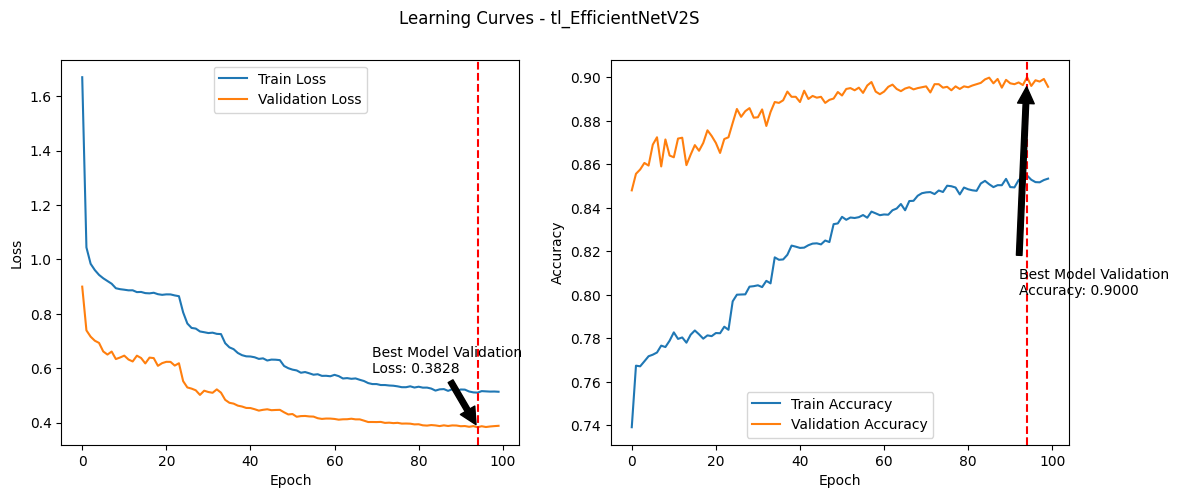

In [ ]:
plt.figure(figsize=(13, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Vertical line at the best epoch
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nLoss: {best_val_loss:.4f}',
             xy=(best_epoch, best_val_loss),
             xytext=(best_epoch - 25, best_val_loss + 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nAccuracy: {best_val_accuracy:.4f}',
             xy=(best_epoch, best_val_accuracy),
             xytext=(best_epoch - 2, best_val_accuracy - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.suptitle('Learning Curves - tl_EfficientNetV2S')
plt.show()

<a name='tl_EfficientNetV2S_ft---Fine-Tuning'></a>
### tl_EfficientNetV2S_ft - Fine Tuning

In [ ]:
tl_EfficientNetV2S_checkpoint_filepath = base_path + 'Models/tl_EfficientNetV2S_checkpoint.keras'
tl_EfficientNetV2S_ft = tf.keras.models.load_model(tl_EfficientNetV2S_checkpoint_filepath)

In [ ]:
# Unfreeze the base model
tl_EfficientNetV2S_ft.trainable = True

In [ ]:
# Hyperparameters
lr = 1e-5
epochs = 15
batch_size = 64

# Optimizer, Loss and Metrics
optimizer = keras.optimizers.Adam(learning_rate=lr)
loss_function = keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']

In [ ]:
# Reduce Learning Rate On Plateau
callback_rp = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                factor=0.5,
                                                patience=5,
                                                min_lr=1e-8,
                                                verbose=1)

# Early Stopping
callback_es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True,
                                            verbose=1)

# Model Checkpoint
tl_EfficientNetV2S_ft_checkpoint_filepath = base_path + 'Models/tl_EfficientNetV2S_ft_checkpoint.keras'
callback_cp = keras.callbacks.ModelCheckpoint(tl_EfficientNetV2S_ft_checkpoint_filepath,
                                              monitor='val_loss',
                                              save_best_only=True,
                                              save_weights_only=False,
                                              verbose=1
                                              )

# Backup and Restore
callback_br = keras.callbacks.BackupAndRestore(backup_dir = base_path + "backup/tl_EfficientNetV2S_ft")

# CSV Logger for history saving
history_tl_EfficientNetV2S_ft_filepath = base_path + 'backup/history_tl_EfficientNetV2S_ft.csv'
callback_CSV = keras.callbacks.CSVLogger(history_tl_EfficientNetV2S_ft_filepath, separator=",", append=True)

callbacks = [callback_rp, callback_es, callback_cp, callback_br, callback_CSV]

In [ ]:
tl_EfficientNetV2S_ft.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)
tl_EfficientNetV2S_ft.summary()

Model: "tl_EfficientNetV2S"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 tf.image.resize (TFOpLambd  (None, 128, 128, 3)       0         
 a)                                                              
                                                                 
 efficientnetv2-s (Function  (None, 4, 4, 1280)        20331360  
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                

In [ ]:
# Train end-to-end
history_tl_EfficientNetV2S_ft = tl_EfficientNetV2S_ft.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                                                          epochs=epochs,
                                                          steps_per_epoch=len(X_train) // batch_size,
                                                          validation_data=(X_val, y_val),
                                                          callbacks=callbacks)

Epoch 1/15
703/703 [==============================] - ETA: 0s - loss: 0.3426 - accuracy: 0.9146
Epoch 1: val_loss improved from inf to 0.22699, saving model to /content/drive/MyDrive/Project/Models/tl_EfficientNetV2S_ft_checkpoint.keras
703/703 [==============================] - 368s 406ms/step - loss: 0.3426 - accuracy: 0.9146 - val_loss: 0.2270 - val_accuracy: 0.9548 - lr: 1.0000e-05
Epoch 2/15
703/703 [==============================] - ETA: 0s - loss: 0.2616 - accuracy: 0.9422
Epoch 2: val_loss improved from 0.22699 to 0.20379, saving model to /content/drive/MyDrive/Project/Models/tl_EfficientNetV2S_ft_checkpoint.keras
703/703 [==============================] - 284s 404ms/step - loss: 0.2616 - accuracy: 0.9422 - val_loss: 0.2038 - val_accuracy: 0.9638 - lr: 1.0000e-05
Epoch 3/15
703/703 [==============================] - ETA: 0s - loss: 0.2193 - accuracy: 0.9551
Epoch 3: val_loss improved from 0.20379 to 0.18887, saving model to /content/drive/MyDrive/Project/Models/tl_EfficientNetV

In [ ]:
# Load the CSV file
history_df = pd.read_csv(history_tl_EfficientNetV2S_ft_filepath)

In [ ]:
best_epoch = history_df['val_loss'].idxmin()
best_val_loss = history_df['val_loss'].min()
best_val_accuracy = history_df['val_accuracy'].iloc[best_epoch]

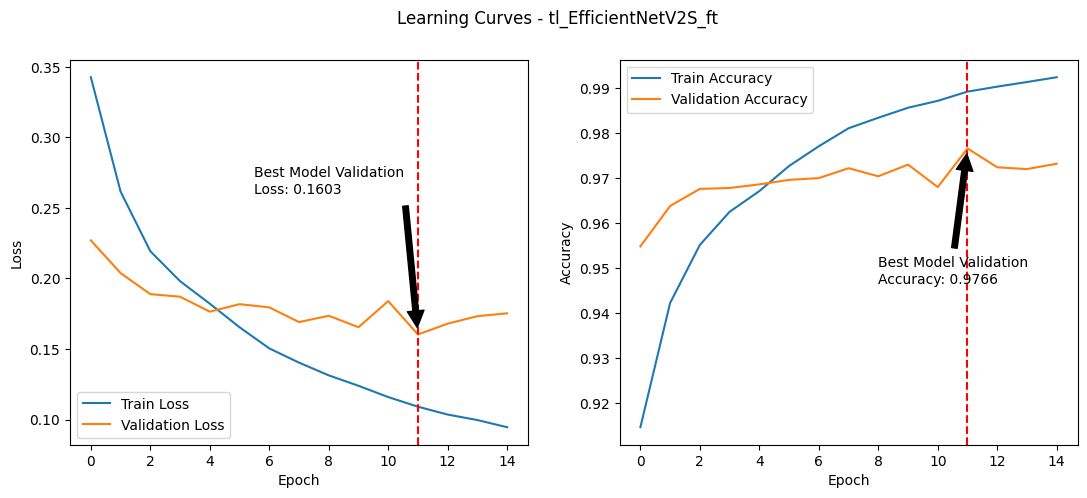

In [ ]:
plt.figure(figsize=(13, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Vertical line at the best epoch
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nLoss: {best_val_loss:.4f}',
             xy=(best_epoch, best_val_loss),
             xytext=(best_epoch - 5.5, best_val_loss + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Model (epoch {best_epoch})')

# Add text annotation for the best validation loss
plt.annotate(f'Best Model Validation\nAccuracy: {best_val_accuracy:.4f}',
             xy=(best_epoch, best_val_accuracy),
             xytext=(best_epoch - 3, best_val_accuracy - 0.03),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.suptitle('Learning Curves - tl_EfficientNetV2S_ft')
plt.show()

<a name='tl_EfficientNetV2S_ft---Evaluation'></a>
### tl_EfficientNetV2S_ft - Evaluation

In [ ]:
# Load the model
tl_EfficientNetV2S_ft_checkpoint_filepath = base_path + 'Models/tl_EfficientNetV2S_ft_checkpoint.keras'
tl_EfficientNetV2S_ft = keras.models.load_model(tl_EfficientNetV2S_ft_checkpoint_filepath)

# Verify the loaded model
loss, acc = tl_EfficientNetV2S_ft.evaluate(X_test, y_test)
print(f"tl_EfficientNetV2S_ft with Fine Tuning accuracy: {acc * 100:.2f}%")

313/313 [==============================] - 20s 48ms/step - loss: 0.1777 - accuracy: 0.9723
tl_EfficientNetV2S_ft with Fine Tuning accuracy: 97.23%


In [ ]:
# Predict the probabilities for the test data
y_pred_prob = tl_EfficientNetV2S_ft.predict(X_test)

313/313 [==============================] - 16s 42ms/step


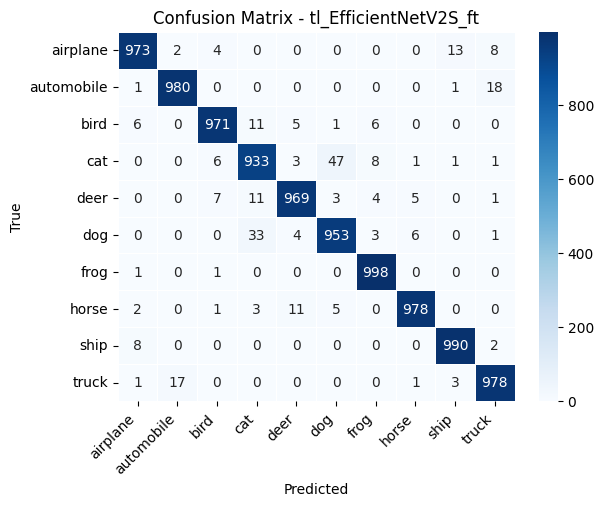

In [ ]:
# Convert predictions and true labels to integer labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names, linewidth=.5)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45 degrees
plt.title("Confusion Matrix - tl_EfficientNetV2S_ft")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<a name='conclusions'></a>
# Conclusions

* **CNN1**: Achieved 72.75% accuracy with 0.8166 loss.
* **CNN2**: Improved to 80.88% accuracy with 0.7564 loss.

* **Residual Model (res_model)**:
Achieved 82.89% accuracy with 0.9794 loss, showcasing the effectiveness of residual architecture in enhancing performance over traditional CNNs.

* **Residual Model + Data Augmentation (res_model_aug)**:
Integration of **Data Augmentation** boosted accuracy to 89.86% with 0.5611 loss, underscoring the importance of data augmentation in improving model generalization.

* **Transfer Learning with ResNet50v2**:
Achieved 96.35% accuracy with 0.1879 loss after fine-tuning on CIFAR-10, demonstrating the efficacy of transfer learning from models pre-trained on larger datasets like ImageNet.

* **Transfer Learning with EfficientNetV2S**:
Outperformed other models with 97.23% accuracy and 0.1777 loss after fine-tuning, highlighting its efficient architecture's capability to capture complex image features.

In [ ]:
# Data for models
data = {
    "Model": ["CNN1", "CNN2", "res_model",
              "res_model_aug",
              "ResNet50v2", "EfficientNetV2S"],
    "Accuracy": ["72.75%", "80.88%", "82.89%", "89.86%", "96.35%", "97.23%"],
    "Loss": ["0.8166", "0.7564", "0.9794", "0.5611", "0.1879", "0.1777"]
}

# Create a DataFrame
df = pd.DataFrame(data)
df

,Model,Accuracy,Loss
0,CNN1,72.75%,0.8166
1,CNN2,80.88%,0.7564
2,res_model,82.89%,0.9794
3,res_model_aug,89.86%,0.5611
4,ResNet50v2,96.35%,0.1879
5,EfficientNetV2S,97.23%,0.1777


<a name='example-image'></a>
# Example image

Here we build some demo code to demonstrate the operation of the models: we load the best model, which resulted being `tl_EfficientNetV2S_ft`, and try to predict the class of some previously unseen images, outside the dataset, and look at the predictions.

In [ ]:
X_train, y_train, X_test, y_test, X_val, y_val = dataloader(batch_files, files_path)

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
num_classes = y_train.shape[1]
print(f"Input shape:\t\t{input_shape}\nNumber of classes:\t{num_classes}")

Input shape:		(32, 32, 3)
Number of classes:	10


In [ ]:
# Load the model
tl_EfficientNetV2S_checkpoint_filepath = base_path + 'Models/tl_EfficientNetV2S_checkpoint.keras'
best_model = keras.models.load_model(tl_EfficientNetV2S_checkpoint_filepath)

In [ ]:
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
image_path = 'Data/cane4.jpg'

In [ ]:
img = cv2.imread(base_path + image_path) #import example image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

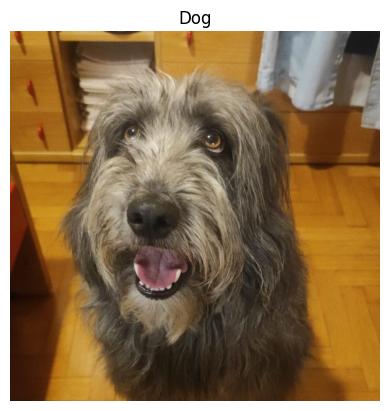

In [ ]:
plt.imshow(img)
plt.title('Dog')
plt.axis('off')
plt.show()

In [ ]:
img = cv2.resize(img, (32, 32)) # resize image as a 32x32
# img = (img - mean) / (std + 1e-8)
img = np.expand_dims(img, axis=0)

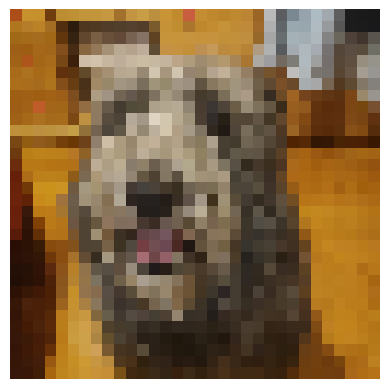

In [ ]:
plt.imshow(img[0])
plt.axis('off')
plt.show()

In [ ]:
predictions = best_model.predict(img)

1/1 [==============================] - 0s 147ms/step
predicted label: 5 - dog


In [ ]:
for i,label in enumerate(label_names):
  print(f"{predictions[0][i]*100:.2f}%\t{label}")

0.06%	airplane
0.01%	automobile
0.29%	bird
2.01%	cat
0.07%	deer
95.90%	dog
0.28%	frog
1.27%	horse
0.05%	ship
0.06%	truck


In [ ]:
predicted_class_index = np.argmax(predictions, axis=1)[0]
print(f"Predicted Label: {predicted_class_index} -> {label_names[predicted_class_index]}")

Predicted Label: 5 -> dog
